Data Preparation and Cleaning: The data was already pretty clean so I spent a lot of time just trying different ways to see exactly what my data consisted of. There was a Git merge issue that I was able to fix by opening my file on my drive and editing the Excel doc.  

1. Handling Missing Values: Critical missing values were removed to ensure data integrity. I tired giving an overview of missing data, removed rows missing critical identifiers or pollen load, and imputed missing flower species (if there was a small proportion). 

2. Handling Duplicates: Duplicates were identified and removed, ensuring each bee-flower-pollen observation is unique and analysis is not skewed.

3. Data Types: Proper data types facilitate accurate grouping and time-based analysis. I tried to check and correct the data types. 

In [254]:

#imports 
# For data manipulation 
import pandas as pd
import io
# Basic plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
# For more advanced visualizations
import seaborn as sns
import sqlite3



In [255]:
#Read in the Dataset
# If the file is in a 'data' folder
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

In [256]:
#First look at the dataset
pollen_load_data

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
...,...,...,...,...,...,...,...,...,...,...,...
3518,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Senecio jacobea,Wild,95,47.5
3519,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1,Senecio jacobea,Senecio jacobea,Wild,55,55
3520,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Sonchus arvensis,Wild,5,2.5
3521,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,25


In [257]:
#Drop/rename columns
pollen_load_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on',
       'Plant pollen', 'Status', 'Proportion', 'Weight'],
      dtype='object')

In [258]:
# Data has been cleaned - no need to drop columns
pollen_load_data.head(10)

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
5,Farm1,ELS,One,24/04/2015,Andrena dorsata,0.5,Sinapis arvensis,Sinapis arvensis,Wild,100,50
6,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
7,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
8,Farm1,ELS,One,24/04/2015,Andrena flavipes,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
9,Farm1,ELS,One,24/04/2015,Andrena haemorrhoa,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100


In [259]:
# Find all unnamed columns
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]

if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    print(f"Dropped columns: {unnamed_cols}")
else:
    print("No unnamed columns found")

No unnamed columns found


In [260]:
#NaNs
pollen_load_data.isnull().sum() * 100 / len(pollen_load_data)

Farm            0.00000
Type            0.05677
Round           0.05677
Date            0.05677
Species         0.05677
Load            0.05677
Netted on       0.05677
Plant pollen    0.05677
Status          0.05677
Proportion      0.05677
Weight          0.05677
dtype: float64

In [261]:
def fix_corrupted_csv(file_path):
    """Fix CSV file with Git merge conflict markers"""
    
    try:
        # Read the raw file
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Check if it has merge conflicts
        if '<<<<<<< HEAD' in content:
            print("Git merge conflicts detected in CSV file!")
            
            # Remove Git merge markers
            lines = content.split('\n')
            clean_lines = []
            
            for line in lines:
                # Skip Git merge conflict markers
                if not any(marker in line for marker in ['<<<<<<< HEAD', '=======', '>>>>>>> ']):
                    clean_lines.append(line)
            
            # Recreate the CSV content
            clean_content = '\n'.join(clean_lines)
            
            # Load as DataFrame
            clean_df = pd.read_csv(io.StringIO(clean_content))
            
            print(f"Fixed! Clean dataset shape: {clean_df.shape}")
            print(f"Clean columns: {clean_df.columns.tolist()}")
            
            return clean_df
        else:
            # No conflicts, load normally
            return pd.read_csv(file_path)
            
    except Exception as e:
        print(f"Error fixing CSV: {e}")
        return None

# Fix and reload data
pollen_load_data = fix_corrupted_csv('../data/2015_pollen_load_data.csv')

if pollen_load_data is not None:
    print("Successfully loaded clean data!")
    print(pollen_load_data.head())
else:
    print("Failed to load data - check the CSV file manually")

Error fixing CSV: [Errno 2] No such file or directory: '../data/2015_pollen_load_data.csv'
Failed to load data - check the CSV file manually


Here I got stuck, I needed help figuring out why I could only pull one Head column and not the other columns. Github Copilot helped me figure out the solution: go into my Excel document and delete the column header, Head. 

In [262]:
def explore_columns_safely(df):
    """Safely explore all columns in the DataFrame"""
    
    print("=== COLUMN EXPLORATION ===")
    print(f"Total columns: {len(df.columns)}")
    
    for i, col in enumerate(df.columns):
        print(f"\n{i+1}. Column: '{col}'")
        print(f"   Data type: {df[col].dtype}")
        print(f"   Non-null values: {df[col].count()}/{len(df)}")
        print(f"   Unique values: {df[col].nunique()}")
        
        # Show unique values for categorical data
        if df[col].dtype == 'object' and df[col].nunique() <= 20:
            print(f"   Unique values: {df[col].unique()}")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"   Range: {df[col].min()} to {df[col].max()}")
        else:
            print(f"   Sample values: {df[col].unique()[:5]}")

# Use it on clean data
if pollen_load_data is not None:
    explore_columns_safely(pollen_load_data)

In [263]:
#Check column data types 
# Always check if your DataFrame exists before using it
if pollen_load_data is not None:
    print("Data types:")
    print(pollen_load_data.dtypes)
else:
    print("Error: pollen_load_data is None - data failed to load")
    print("Please check the CSV file path and format")

Error: pollen_load_data is None - data failed to load
Please check the CSV file path and format


In [264]:
def safe_load_csv(file_path):
    """Safely load CSV with comprehensive error handling"""
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            return None
        
        # Try to load the CSV
        df = pd.read_csv(file_path)
        print(f"✅ Successfully loaded {len(df)} rows and {len(df.columns)} columns")
        return df
        
    except FileNotFoundError:
        print(f"❌ File not found: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"❌ File is empty: {file_path}")
        return None
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return None

# Use the safe loading function
pollen_load_data = safe_load_csv('../data/2015_pollen_load_data.csv')

# Only proceed if data loaded successfully
if pollen_load_data is not None:
    print("\nData types:")
    print(pollen_load_data.dtypes)
    print("\nDataset shape:")
    print(pollen_load_data.shape)
else:
    print("Cannot analyze data types - data loading failed")

File not found: ../data/2015_pollen_load_data.csv
Cannot analyze data types - data loading failed


In [265]:
def fix_and_load_csv(file_path):
    """Fix Git merge conflicts and load CSV"""
    try:
        # Read raw file content
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Check for Git merge conflict markers
        conflict_markers = ['<<<<<<< HEAD', '=======', '>>>>>>> ']
        has_conflicts = any(marker in content for marker in conflict_markers)
        
        if has_conflicts:
            print("🔧 Git merge conflicts detected, cleaning...")
            
            # Remove conflict markers
            lines = content.split('\n')
            clean_lines = [line for line in lines 
                          if not any(marker in line for marker in conflict_markers)]
            
            # Create clean content
            clean_content = '\n'.join(clean_lines)
            
            # Load from cleaned content
            df = pd.read_csv(io.StringIO(clean_content))
            print(f"✅ Fixed and loaded {len(df)} rows")
            return df
        else:
            # No conflicts, load normally
            df = pd.read_csv(file_path)
            print(f"✅ Loaded {len(df)} rows")
            return df
            
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# Load the data with conflict resolution
pollen_load_data = fix_and_load_csv('../data/2015_pollen_load_data.csv')

# Safe access to dtypes
if pollen_load_data is not None:
    print("Data types:")
    print(pollen_load_data.dtypes)
else:
    print("Failed to load data - check the file manually")

❌ Error: [Errno 2] No such file or directory: '../data/2015_pollen_load_data.csv'
Failed to load data - check the file manually


In [266]:
# Debug the current state
print("Type of pollen_load_data:", type(pollen_load_data))
print("Value of pollen_load_data:", pollen_load_data)

# Check if the variable exists
if 'pollen_load_data' in locals():
    if pollen_load_data is None:
        print("Variable exists but is None - reload the data")
    else:
        print("Data loaded successfully")
else:
    print("Variable doesn't exist - need to load data first")

Type of pollen_load_data: <class 'NoneType'>
Value of pollen_load_data: None
Variable exists but is None - reload the data


In [267]:
# Reload data to start fresh
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

# Drop all unnamed columns at once
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]
if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    
print("Cleaned columns:")
print(pollen_load_data.columns.tolist())

Cleaned columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [268]:
# Check what columns exist
print("Available columns:")
print(pollen_load_data.columns.tolist())

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [269]:
# Find columns that might contain dates
date_columns = [col for col in pollen_load_data.columns if any(word in col.lower() for word in ['date', 'time', 'day', 'month', 'year'])]
print("Potential date columns:", date_columns)

Potential date columns: ['Date']


In [270]:
# Look at the data to identify the date column
print(pollen_load_data.head())
print("\nColumn data types:")
print(pollen_load_data.dtypes)

    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion

In [271]:
#Seperate the data from one column into multiple columns 
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [272]:
# Find columns that might contain pollen data
pollen_columns = [col for col in pollen_load_data.columns if 'pollen' in col.lower()]
print("Pollen-related columns:", pollen_columns)

Pollen-related columns: ['Plant pollen']


In [273]:
# Look for columns with similar names
for col in pollen_load_data.columns:
    if any(word in col.lower() for word in ['pollen', 'plant', 'species', 'flower']):
        print(f"Potential column: {col}")

Potential column: Species
Potential column: Plant pollen


In [274]:
# Look at the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(pollen_load_data.head())
print("\nColumn names and types:")
print(pollen_load_data.dtypes)

First 5 rows of the dataset:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column names and types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object

In [275]:
# Get info about all columns
print("Dataset Info:")
print(pollen_load_data.info())
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

First 5 rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/201

In [276]:
#Remove duplicates
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]

pollen_load_data.drop_duplicates(keep="first", inplace=True)

In [277]:
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]


,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight


In [278]:
#Save as a variable
pollen_df = pd.read_csv("data/2015_pollen_load_data.csv")
pollen_df.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [279]:
# Look for categorical columns that might represent status
for col in pollen_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {pollen_df[col].dtype}")
    print(f"Unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")
    print("-" * 40)

Column: Farm
Data type: object
Unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']
----------------------------------------
Column: Type
Data type: object
Unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']
----------------------------------------
Column: Round
Data type: object
Unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]
----------------------------------------
Column: Date
Data type: object
Unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']
----------------------------------------
Column: Species
Data type: object
Unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']
----------------------------------------
Column: Load
Data type: object
Unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']
----------------------------------------
Column: Netted on
Data type: object
Unique values: 62
Sample valu

In [280]:
# Try these common variations:
possible_names = ['Plant pollen', 'Plant_pollen', 'plant pollen', 'Pollen', 'pollen', 'PlantPollen']

for name in possible_names:
    if name in pollen_df.columns:
        print(f"Found column: '{name}'")
        avg_plant_pollen = pollen_df[name].value_counts().sort_values(ascending=False)
        print(avg_plant_pollen)
        break
else:
    print("Column not found. Available columns:")
    print(pollen_df.columns.tolist())

Found column: 'Plant pollen'
Plant pollen
Tripleurospermum inodorum    414
Leucanthemum vulgare         304
Heracleum sphondylium        264
Centaurea nigra              224
Rubus fruticosus agg.        180
                            ... 
Euphorbia amygdaloides         2
Castanea sativa                2
Prunella vulgaris              2
Origanum vulgare               2
Plant pollen                   1
Name: count, Length: 94, dtype: int64


In [281]:
# Get detailed info about all columns
print("Dataset Info:")
print(pollen_df.info())
print("\nFirst few rows:")
print(pollen_df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2

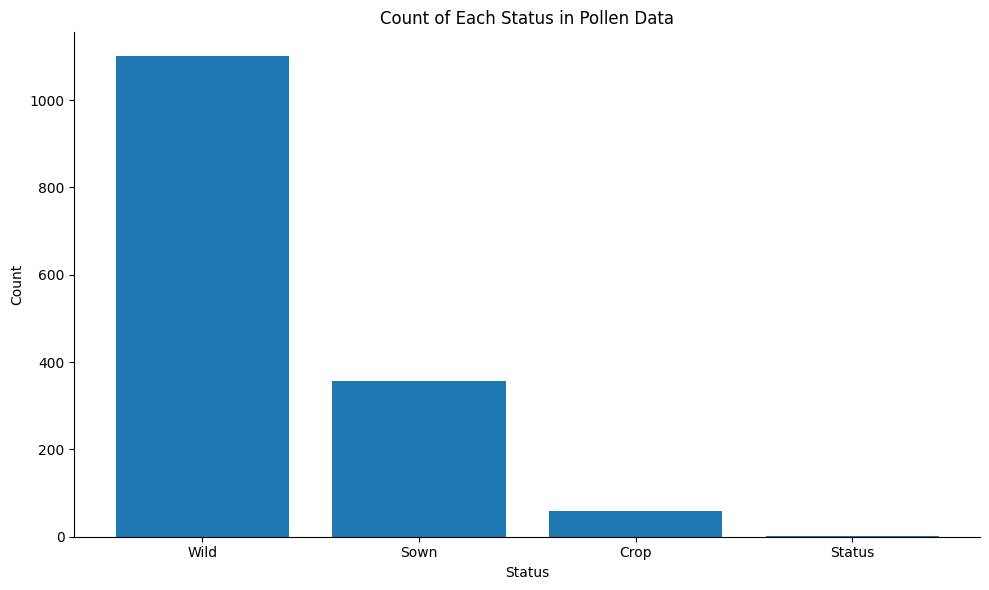

In [282]:
# Get value counts for Status column
value_counts = pollen_load_data['Status'].value_counts()

# Select top 5 statuses
value_counts = value_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.tight_layout()
plt.show()

The work completed in this notebook helped me to figure out what exactly my data is, what it can do, and what it can show.

The above graph shows that bees are gathering plant pollen from the Wild flowers the most. 

Top 5 Bee Species:
Species
Lasioglossum malachurum    1448
Andrena semilaevis          298
Andrena flavipes            222
Lasioglossum pauxillum      204
Lasioglossum calceatum      142
Name: count, dtype: int64


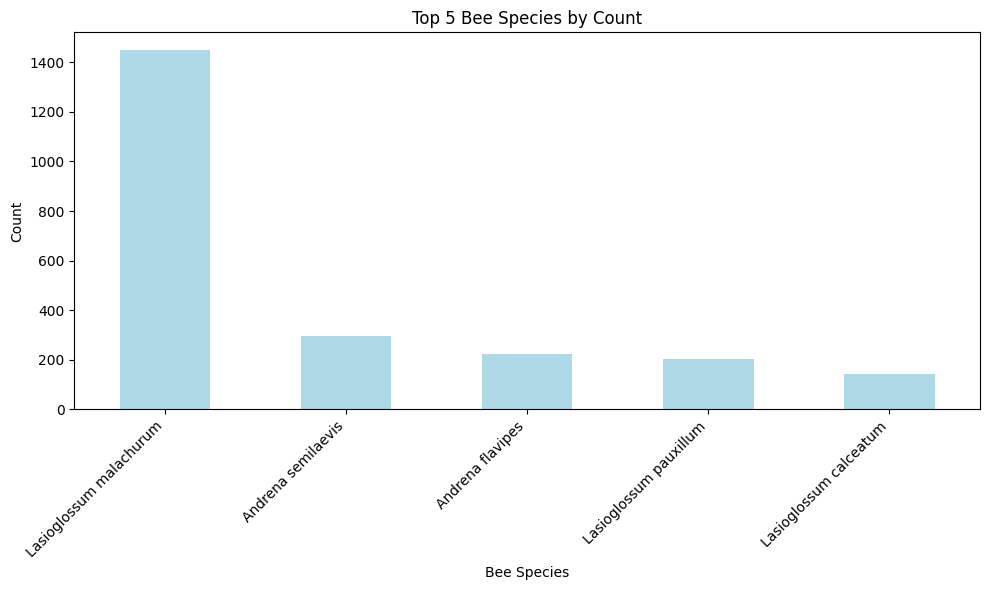

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion      object
Weight          object
dtype: object

Categorical columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Farm unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']

Type unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']

Round unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]

Date unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']

Species unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']

Load unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']

Netted on unique values: 62
Sample v

In [283]:
# Show the top 5 bee species with counts
print("Top 5 Bee Species:")
top_5_species = pollen_df['Species'].value_counts().head(5)
print(top_5_species)

# Create a simple bar plot
plt.figure(figsize=(10, 6))
top_5_species.plot(kind='bar', color='lightblue')
plt.title('Top 5 Bee Species by Count')
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()# Check data types to find categorical columns
print("Column data types:")
print(pollen_df.dtypes)

# Look for text/object columns that might represent species
categorical_cols = pollen_df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns: {categorical_cols.tolist()}")

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\n{col} unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")

The above graph is showing the different bee species, and how many of each species were studied for this particular data research. 

In [284]:
# Load both datasets
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

# Check the structure of both DataFrames
print("=== Pollen DataFrame Info ===")
print(pollen_df.info())
print("\n=== Visit DataFrame Info ===")
print(visit_df.info())

# Preview the data
print("\n=== Pollen DataFrame Sample ===")
print(pollen_df.head())
print("\n=== Visit DataFrame Sample ===")
print(visit_df.head())

=== Pollen DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

=== Visit DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      246

In [285]:
# Safe way to check DataFrame columns
def safe_column_check(df, df_name="DataFrame"):
    """Safely check if DataFrame exists and show its columns"""
    
    if df is None:
        print(f"❌ {df_name} is None - data loading failed")
        print("Please check your file path and loading process")
        return False
    
    if not isinstance(df, pd.DataFrame):
        print(f"❌ {df_name} is not a DataFrame (type: {type(df)})")
        return False
    
    print(f"✅ {df_name} loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    return True

# Check your DataFrame before using it
if safe_column_check(pollen_df, "pollen_df"):
    # Only run this if DataFrame exists
    for col in pollen_df.columns:
        print(f"Column: {col}")
        print(f"Data type: {pollen_df[col].dtype}")
        print(f"Sample values: {pollen_df[col].head().tolist()}")
        print("-" * 40)
else:
    print("Cannot analyze columns - DataFrame not loaded")

✅ pollen_df loaded successfully!
Shape: (3523, 11)
Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Column: Farm
Data type: object
Sample values: ['Farm1', 'Farm1', 'Farm1', 'Farm1', 'Farm1']
----------------------------------------
Column: Type
Data type: object
Sample values: ['ELS', 'ELS', 'ELS', 'ELS', 'ELS']
----------------------------------------
Column: Round
Data type: object
Sample values: ['One', 'One', 'One', 'One', 'One']
----------------------------------------
Column: Date
Data type: object
Sample values: ['24/04/2015', '24/04/2015', '24/04/2015', '24/04/2015', '24/04/2015']
----------------------------------------
Column: Species
Data type: object
Sample values: ['Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor', 'Andrena carantonica', 'Andrena carantonica']
----------------------------------------
Column: Load
Data type: object
Sample values: ['1', '0.25', '0.75', '1', '1']
--------------

In [286]:
# Step 1: Reload the data with error checking
def safe_load_with_fallback():
    """Try multiple methods to load the pollen data"""
    
    # Method 1: Standard loading
    file_paths = [
        'data/2015_pollen_load_data.csv',
        '../data/2015_pollen_load_data.csv',
        '2015_pollen_load_data.csv'
    ]
    
    for path in file_paths:
        if os.path.exists(path):
            print(f"📁 Trying to load: {path}")
            try:
                df = pd.read_csv(path)
                print(f"✅ Success! Loaded {len(df)} rows, {len(df.columns)} columns")
                return df
            except Exception as e:
                print(f"❌ Failed: {e}")
                continue
        else:
            print(f"❌ File not found: {path}")
    
    print("❌ Could not load data from any path")
    return None

# Load the data
pollen_df = safe_load_with_fallback()

# Now safely check columns
if pollen_df is not None:
    print("\n=== Column Analysis ===")
    for col in pollen_df.columns:
        print(f"Column: {col}")
        print(f"Data type: {pollen_df[col].dtype}")
        print(f"Non-null values: {pollen_df[col].count()}/{len(pollen_df)}")
        print(f"Unique values: {pollen_df[col].nunique()}")
        print(f"Sample: {pollen_df[col].dropna().head(3).tolist()}")
        print("-" * 50)
else:
    print("❌ Cannot analyze columns - pollen_df is None")
    print("Please check your data file location and format")

📁 Trying to load: data/2015_pollen_load_data.csv
✅ Success! Loaded 3523 rows, 11 columns

=== Column Analysis ===
Column: Farm
Data type: object
Non-null values: 3523/3523
Unique values: 17
Sample: ['Farm1', 'Farm1', 'Farm1']
--------------------------------------------------
Column: Type
Data type: object
Non-null values: 3521/3523
Unique values: 3
Sample: ['ELS', 'ELS', 'ELS']
--------------------------------------------------
Column: Round
Data type: object
Non-null values: 3521/3523
Unique values: 5
Sample: ['One', 'One', 'One']
--------------------------------------------------
Column: Date
Data type: object
Non-null values: 3521/3523
Unique values: 31
Sample: ['24/04/2015', '24/04/2015', '24/04/2015']
--------------------------------------------------
Column: Species
Data type: object
Non-null values: 3521/3523
Unique values: 48
Sample: ['Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor']
--------------------------------------------------
Column: Load
Data type: object
Non-n

In [287]:
# Debug current state
print("=== Current Variable Status ===")

variables_to_check = ['pollen_df', 'pollen_load_data', 'visit_df', 'flower_visitation_data']

for var_name in variables_to_check:
    if var_name in locals():
        var_value = locals()[var_name]
        if var_value is None:
            print(f"{var_name}: None ❌")
        elif isinstance(var_value, pd.DataFrame):
            print(f"{var_name}: DataFrame with shape {var_value.shape} ✅")
        else:
            print(f"{var_name}: {type(var_value)} ❓")
    else:
        print(f"{var_name}: Not defined ❌")

# Check current working directory and available files
print(f"\nCurrent directory: {os.getcwd()}")
print("Available files:")
try:
    for file in os.listdir('.'):
        if file.endswith('.csv'):
            print(f"  📄 {file}")
except:
    print("  Could not list files")

=== Current Variable Status ===
pollen_df: DataFrame with shape (3523, 11) ✅
pollen_load_data: DataFrame with shape (1519, 11) ✅
visit_df: DataFrame with shape (2467, 11) ✅
flower_visitation_data: DataFrame with shape (2467, 11) ✅

Current directory: c:\Github\wuuwuudata\Bee_pollen_project
Available files:


In [288]:
# Template for safe DataFrame operations
def safe_dataframe_operation(df, operation_name):
    """Template for safely working with DataFrames"""
    
    if df is None:
        print(f"❌ Cannot perform {operation_name}: DataFrame is None")
        return None
    
    if df.empty:
        print(f"❌ Cannot perform {operation_name}: DataFrame is empty")
        return None
    
    try:
        # DataFrame operations 
        print(f"✅ Performing {operation_name}")
        return df
    except Exception as e:
        print(f"❌ Error in {operation_name}: {e}")
        return None

# Usage example
def analyze_columns_safely(df):
    """Safely analyze DataFrame columns"""
    
    if df is None:
        print("❌ Cannot analyze columns: DataFrame is None")
        return
    
    print(f"📊 Analyzing DataFrame with {len(df.columns)} columns:")
    
    for i, col in enumerate(df.columns):
        print(f"\n{i+1}. '{col}':")
        print(f"   Type: {df[col].dtype}")
        print(f"   Non-null: {df[col].count()}/{len(df)}")
        print(f"   Unique: {df[col].nunique()}")
        
        # Show sample values safely
        sample_values = df[col].dropna().head(3).tolist()
        print(f"   Sample: {sample_values}")

# Use it safely
analyze_columns_safely(pollen_df)

📊 Analyzing DataFrame with 11 columns:

1. 'Farm':
   Type: object
   Non-null: 3523/3523
   Unique: 17
   Sample: ['Farm1', 'Farm1', 'Farm1']

2. 'Type':
   Type: object
   Non-null: 3521/3523
   Unique: 3
   Sample: ['ELS', 'ELS', 'ELS']

3. 'Round':
   Type: object
   Non-null: 3521/3523
   Unique: 5
   Sample: ['One', 'One', 'One']

4. 'Date':
   Type: object
   Non-null: 3521/3523
   Unique: 31
   Sample: ['24/04/2015', '24/04/2015', '24/04/2015']

5. 'Species':
   Type: object
   Non-null: 3521/3523
   Unique: 48
   Sample: ['Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor']

6. 'Load':
   Type: object
   Non-null: 3521/3523
   Unique: 8
   Sample: ['1', '0.25', '0.75']

7. 'Netted on':
   Type: object
   Non-null: 3521/3523
   Unique: 62
   Sample: ['Sinapis arvensis', 'Sinapis arvensis', 'Sinapis arvensis']

8. 'Plant pollen':
   Type: object
   Non-null: 3521/3523
   Unique: 94
   Sample: ['Sinapis arvensis', 'Sinapis arvensis', 'Sinapis arvensis']

9. 'Status':
   Type:

In [289]:
# Check what columns exist and their data types
print("All columns and their types:")
for col in pollen_df.columns:
    dtype = pollen_df[col].dtype
    sample_val = str(pollen_df[col].iloc[0]) if len(pollen_df) > 0 else 'N/A'
    print(f"{col}: {dtype} | Sample: {sample_val}")

# Look for potential load columns
print("\nPotential load columns:")
load_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['load', 'weight', 'mass', 'size', 'amount'])]
for col in load_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

# Look for species columns  
print("\nPotential species columns:")
species_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['species', 'bee', 'type', 'genus', 'name'])]
for col in species_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

All columns and their types:
Farm: object | Sample: Farm1
Type: object | Sample: ELS
Round: object | Sample: One
Date: object | Sample: 24/04/2015
Species: object | Sample: Andrena bicolor
Load: object | Sample: 1
Netted on: object | Sample: Sinapis arvensis
Plant pollen: object | Sample: Sinapis arvensis
Status: object | Sample: Wild
Proportion: object | Sample: 100
Weight: object | Sample: 100

Potential load columns:
- Load: object
  Unique values: ['1' '0.25' '0.75' '0.5' '0.125']
- Weight: object
  Unique values: ['100' '25' '75' '50' '12.5']

Potential species columns:
- Type: object
  Unique values: ['ELS' 'HLS' nan 'Type']
- Species: object
  Unique values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']


In [290]:
# Load the data
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

# Find date columns
print("Looking for date columns...")
for col in pollen_load_data.columns:
    print(f"Column: {col}")
    print(f"Sample values: {pollen_load_data[col].head()}")
    print("-" * 30)


Looking for date columns...
Column: Farm
Sample values: 0    Farm1
1    Farm1
2    Farm1
3    Farm1
4    Farm1
Name: Farm, dtype: object
------------------------------
Column: Type
Sample values: 0    ELS
1    ELS
2    ELS
3    ELS
4    ELS
Name: Type, dtype: object
------------------------------
Column: Round
Sample values: 0    One
1    One
2    One
3    One
4    One
Name: Round, dtype: object
------------------------------
Column: Date
Sample values: 0    24/04/2015
1    24/04/2015
2    24/04/2015
3    24/04/2015
4    24/04/2015
Name: Date, dtype: object
------------------------------
Column: Species
Sample values: 0        Andrena bicolor
1        Andrena bicolor
2        Andrena bicolor
3    Andrena carantonica
4    Andrena carantonica
Name: Species, dtype: object
------------------------------
Column: Load
Sample values: 0       1
1    0.25
2    0.75
3       1
4       1
Name: Load, dtype: object
------------------------------
Column: Netted on
Sample values: 0    Sinapis arvensis

In [291]:
# Clean the Date column before conversion
if 'Date' in pollen_load_data.columns:
    print("Original Date column sample:")
    print(pollen_load_data['Date'].head(10))
    
    # Remove rows where Date column contains non-date strings
    mask = ~pollen_load_data['Date'].astype(str).str.lower().isin(['date', 'nan', 'null', ''])
    clean_data = pollen_load_data[mask].copy()
    
    print(f"\nData cleaning results:")
    print(f"Original rows: {len(pollen_load_data)}")
    print(f"Clean rows: {len(clean_data)}")
    print(f"Removed rows: {len(pollen_load_data) - len(clean_data)}")
    
    #  Convert the cleaned data
    try:
        clean_data['Date'] = pd.to_datetime(clean_data['Date'], dayfirst=True)
        print("Date conversion successful!")
        print(f"Date range: {clean_data['Date'].min()} to {clean_data['Date'].max()}")
        
        # Replace the original dataframe with cleaned version
        pollen_load_data = clean_data
        
    except Exception as e:
        print(f"Error even after cleaning: {e}")
        print("Sample of remaining Date values:")
        print(clean_data['Date'].unique()[:10])
else:
    print("'Date' column not found in data")

Original Date column sample:
0    24/04/2015
1    24/04/2015
2    24/04/2015
3    24/04/2015
4    24/04/2015
5    24/04/2015
6    24/04/2015
7    24/04/2015
8    24/04/2015
9    24/04/2015
Name: Date, dtype: object

Data cleaning results:
Original rows: 3523
Clean rows: 3520
Removed rows: 3
Date conversion successful!
Date range: 2015-04-22 00:00:00 to 2015-08-10 00:00:00


In [292]:
# Inspect the Date column thoroughly
if 'Date' in pollen_load_data.columns:
    print("Date column inspection:")
    print(f"Data type: {pollen_load_data['Date'].dtype}")
    print(f"Total values: {len(pollen_load_data['Date'])}")
    print(f"Unique values: {pollen_load_data['Date'].nunique()}")
    
    print(f"\nFirst 15 values:")
    print(pollen_load_data['Date'].head(15).tolist())
    
    print(f"\nValue around position 31:")
    if len(pollen_load_data) > 35:
        print(pollen_load_data['Date'].iloc[28:35].tolist())
    
    print(f"\nUnique values (first 20):")
    print(pollen_load_data['Date'].unique()[:20])
    
    # Check for the specific problematic value
    problem_rows = pollen_load_data[pollen_load_data['Date'].astype(str) == 'Date']
    if len(problem_rows) > 0:
        print(f"\nFound {len(problem_rows)} rows with 'Date' as value:")
        print(problem_rows.head())

Date column inspection:
Data type: datetime64[ns]
Total values: 3520
Unique values: 30

First 15 values:
[Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00')]

Value around position 31:
[Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00')]

Unique values (first 20):
<DatetimeArray>
['2015-04-24 00:00:00', '2015-06-16 00:00:00', '2015-06-29 00:00:00',
 '201

In [293]:
# Summary statistics
print(pollen_load_data.describe())

                                Date
count                           3520
mean   2015-06-21 01:37:21.818181888
min              2015-04-22 00:00:00
25%              2015-06-10 00:00:00
50%              2015-06-27 00:00:00
75%              2015-07-03 00:00:00
max              2015-08-10 00:00:00


In [294]:
# Check what columns exist
print("Available columns:")
print(pollen_load_data.columns.tolist())

# Check data types to find numeric columns
print("\nColumn data types:")
print(pollen_load_data.dtypes)

# Look for numeric columns that might represent load/weight
numeric_cols = pollen_load_data.select_dtypes(include=['int64', 'float64']).columns
print(f"\nNumeric columns: {numeric_cols.tolist()}")

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Column data types:
Farm                    object
Type                    object
Round                   object
Date            datetime64[ns]
Species                 object
Load                    object
Netted on               object
Plant pollen            object
Status                  object
Proportion              object
Weight                  object
dtype: object

Numeric columns: []


In [295]:
# Show first few rows to understand the data
print("First 5 rows:")
print(pollen_load_data.head())

# Show summary statistics for numeric columns
print("\nNumeric column summaries:")
print(pollen_load_data.describe())

First 5 rows:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Numeric column summaries:
                                Date
count                           3520
mean   2015-06-21 01:37:21.818181888
min              2015-04-22 00:00:00
25%              2015-06-10 00:00:00
50%              

In [296]:
# Get correlation matrix for all numeric columns
numeric_data = pollen_load_data.select_dtypes(include=['number'])
if len(numeric_data.columns) > 1:
    correlation_matrix = numeric_data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
else:
    print("Not enough numeric columns for correlation analysis")

Not enough numeric columns for correlation analysis


In [297]:
# Use cleaned data for all analysis
print("My actual bee pollen data:")
print(pollen_load_data.head())
print(f"Shape: {pollen_load_data.shape}")
print(f"Columns: {pollen_load_data.columns.tolist()}")

My actual bee pollen data:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  
Shape: (3520, 11)
Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


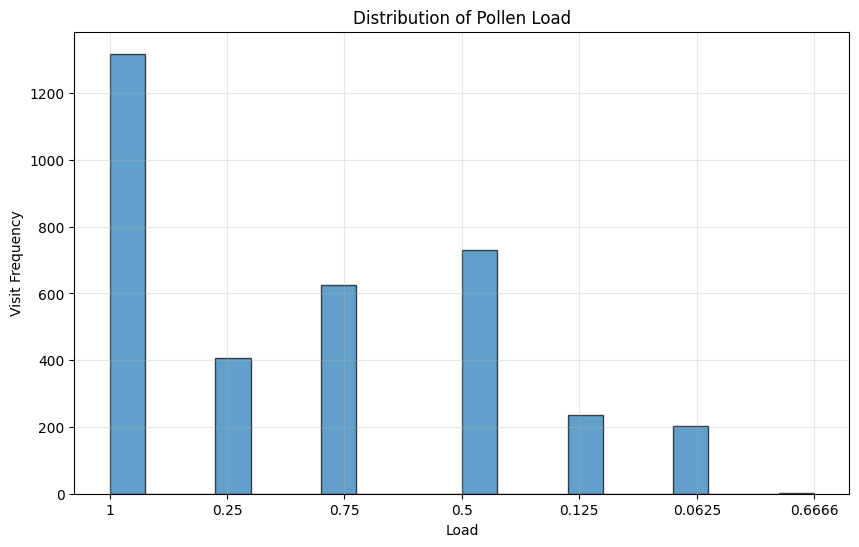

Plotted 3520 valid values


In [298]:
def safe_histogram(data, column_name, title="Distribution"):
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    clean_data = data[column_name].dropna()
    
    if len(clean_data) == 0:
        print(f"No valid data found in column '{column_name}'")
        return
    
    plt.figure(figsize=(10, 6))
    plt.hist(clean_data, bins=20, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Visit Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Plotted {len(clean_data)} valid values")

# Usage 
safe_histogram(pollen_load_data, 'Load', 'Distribution of Pollen Load')

Visit Frequency vs. Pollen Load 

Purpose: This chart explains the relationship between how often a bee visits flowers and the amount of pollen it collects. It can indicate whether more frequent visits correlate with greater pollen collection. 

Interpretation: If the chart shows a positive correlaton, it suggests that bees who visit flowers more often are also collecting more pollen, highlighting the link between activity level and foraging success. 

In [299]:
# Use the correct relative path
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')  

In [300]:
# Check what files are in the data directory
print("\nFiles in ../data directory:")
try:
    print(os.listdir('../data'))
except FileNotFoundError:
    print("../data directory not found")

# Check your current working directory
print(f"\nCurrent working directory: {os.getcwd()}")


Files in ../data directory:
../data directory not found

Current working directory: c:\Github\wuuwuudata\Bee_pollen_project


In [301]:
# Read my data
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

In [302]:
# Find common columns between both DataFrames
common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
print("Common columns between datasets:")
print(list(common_cols))

# Check the structure of both DataFrames
print("\nPollen DataFrame columns:")
print(pollen_df.columns.tolist())

print("\nVisit DataFrame columns:")
print(visit_df.columns.tolist())

Common columns between datasets:
['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']

Pollen DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Visit DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']


In [303]:
# Look for potential merge keys
for col in common_cols:
    print(f"\nColumn: {col}")
    print(f"Pollen DF - Type: {pollen_df[col].dtype}, Unique values: {pollen_df[col].nunique()}")
    print(f"Visit DF - Type: {visit_df[col].dtype}, Unique values: {visit_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:3]}")


Column: Species
Pollen DF - Type: object, Unique values: 48
Visit DF - Type: object, Unique values: 87
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata']

Column: Status
Pollen DF - Type: object, Unique values: 4
Visit DF - Type: object, Unique values: 4
Sample values: ['Wild' 'Sown' 'Crop']

Column: Farm
Pollen DF - Type: object, Unique values: 17
Visit DF - Type: object, Unique values: 22
Sample values: ['Farm1' 'Farm10' 'Farm11']

Column: Date
Pollen DF - Type: object, Unique values: 31
Visit DF - Type: object, Unique values: 84
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015']

Column: Round
Pollen DF - Type: object, Unique values: 5
Visit DF - Type: object, Unique values: 5
Sample values: ['One' 'Two' 'Three']

Column: Type
Pollen DF - Type: object, Unique values: 3
Visit DF - Type: object, Unique values: 3
Sample values: ['ELS' 'HLS' nan]


In [304]:
# Safe string conversion for any column
def safe_string_conversion(data, column_name):
    """Safely convert a column to string"""
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return False
    
    try:
        data[column_name] = data[column_name].astype(str)
        print(f"Successfully converted '{column_name}' to string")
        return True
    except Exception as e:
        print(f"Error converting '{column_name}' to string: {e}")
        return False

# Find the correct date column first
date_col = None
for col in pollen_df.columns:
    if 'date' in col.lower():
        date_col = col
        break

if date_col:
    safe_string_conversion(pollen_df, date_col)
else:
    print("No date column found. Available columns:")
    print(pollen_df.columns.tolist())

Successfully converted 'Date' to string


In [305]:
def safe_merge_and_check_missing(df1, df2, merge_col=None):
    """Safely merge two DataFrames and check for missing values"""
    
    # Find common columns if merge_col not specified
    if merge_col is None:
        common_cols = set(df1.columns).intersection(set(df2.columns))
        if not common_cols:
            print("No common columns found for merging")
            return None
        merge_col = list(common_cols)[0]
    
    # Check if merge column exists in both DataFrames
    if merge_col not in df1.columns:
        print(f"Column '{merge_col}' not found in first DataFrame")
        print(f"Available columns: {df1.columns.tolist()}")
        return None
    
    if merge_col not in df2.columns:
        print(f"Column '{merge_col}' not found in second DataFrame")
        print(f"Available columns: {df2.columns.tolist()}")
        return None
    
    try:
        # Perform the merge
        merged_df = pd.merge(df1, df2, on=merge_col, how='inner')
        print(f"Successfully merged DataFrames on '{merge_col}'")
        print(f"Merged DataFrame shape: {merged_df.shape}")
        
        # Check for missing values
        missing = merged_df.isnull().sum()
        print("\nMissing values per column:")
        print(missing[missing > 0])  # Only show columns with missing values
        
        return merged_df
        
    except Exception as e:
        print(f"Error during merge: {e}")
        return None

# Usage
merged_df = safe_merge_and_check_missing(pollen_df, visit_df)

Successfully merged DataFrames on 'Species'
Merged DataFrame shape: (647301, 21)

Missing values per column:
Type_x          4
Round_x         4
Species         4
Load            4
Netted on       4
Plant pollen    4
Status_x        4
Proportion      4
Weight          4
Type_y          4
Round_y         4
Date_y          4
Number          4
Caste           4
Visiting        4
Status_y        4
Purpose         4
Family          4
dtype: int64


In [306]:
# Step 1: Check if DataFrames exist
print("Checking DataFrames...")
print(f"pollen_df type: {type(pollen_df)}")
print(f"visit_df type: {type(visit_df)}")

if pollen_df is not None and visit_df is not None:
    # Step 2: Find merge columns
    common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
    print(f"Common columns: {list(common_cols)}")
    
    if common_cols:
        # Step 3: Attempt merge
        merge_col = list(common_cols)[0]
        print(f"Attempting to merge on: '{merge_col}'")
        
        try:
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            print(f"Merge successful! Shape: {merged_df.shape}")
            
            # Step 4: Check for required columns before cleaning
            required_cols = ['Species', 'Load']
            available_cols = merged_df.columns.tolist()
            
            print(f"Required columns: {required_cols}")
            print(f"Available columns: {available_cols}")
            
            missing_required = [col for col in required_cols if col not in available_cols]
            
            if not missing_required:
                # Step 5: Safe dropna
                initial_shape = merged_df.shape
                merged_df = merged_df.dropna(subset=required_cols)
                final_shape = merged_df.shape
                
                print(f"Cleaned data: {initial_shape} -> {final_shape}")
            else:
                print(f"Cannot clean data - missing columns: {missing_required}")
                
        except Exception as e:
            print(f"Merge failed: {e}")
            merged_df = None
    else:
        print("No common columns for merging")
        merged_df = None
else:
    print("One or both DataFrames are None")
    merged_df = None

# Step 6: Final check
if merged_df is not None:
    print(f"Final merged_df shape: {merged_df.shape}")
    print("Success!")
else:
    print("merged_df is still None - check the steps above")

Checking DataFrames...
pollen_df type: <class 'pandas.core.frame.DataFrame'>
visit_df type: <class 'pandas.core.frame.DataFrame'>
Common columns: ['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']
Attempting to merge on: 'Species'
Merge successful! Shape: (647301, 21)
Required columns: ['Species', 'Load']
Available columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Cleaned data: (647301, 21) -> (647297, 21)
Final merged_df shape: (647297, 21)
Success!


In [307]:
actual_load_column = 'Load'  

if actual_load_column in pollen_load_data.columns:
    print("Unique values:")
    print(pollen_load_data[actual_load_column].unique())
    
    print("\nDescriptive statistics:")
    print(pollen_load_data[actual_load_column].describe())
else:
    print(f"Column '{actual_load_column}' not found")

Unique values:
['1' '0.25' '0.75' '0.5' '0.125' '0.0625' '0.6666']

Descriptive statistics:
count     3520
unique       7
top          1
freq      1318
Name: Load, dtype: object


In [308]:
def explore_column(data, column_name):
    """Safely explore a column's values and statistics"""
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    print(f"Exploring column: {column_name}")
    print(f"Data type: {data[column_name].dtype}")
    print(f"Non-null count: {data[column_name].count()}/{len(data)}")
    
    if data[column_name].dtype in ['object', 'category']:
        print("Unique values:")
        print(data[column_name].unique())
        print("\nValue counts:")
        print(data[column_name].value_counts())
    else:
        print("Descriptive statistics:")
        print(data[column_name].describe())
        print("\nUnique values (first 10):")
        print(data[column_name].unique()[:10])

# Usage
explore_column(pollen_load_data, '<<<<<<< HEAD')

Column '<<<<<<< HEAD' not found. Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [309]:
# First, load the data and see what I'm working with
print("Dataset shape:", pollen_load_data.shape)
print("\nAll columns:")
for i, col in enumerate(pollen_load_data.columns):
    print(f"{i}: {col}")

# Show first few rows to understand the data structure
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset shape: (3520, 11)

All columns:
0: Farm
1: Type
2: Round
3: Date
4: Species
5: Load
6: Netted on
7: Plant pollen
8: Status
9: Proportion
10: Weight

First 5 rows:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


In [310]:
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,2015-04-24,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,2015-04-24,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,2015-04-24,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [311]:
# See what my data looks like
print("Dataset shape:", pollen_load_data.shape)
print("\nColumn info:")
for col in pollen_load_data.columns:
    dtype = pollen_load_data[col].dtype
    sample_val = str(pollen_load_data[col].iloc[0]) if len(pollen_load_data) > 0 else 'N/A'
    print(f"{col}: {dtype} | Sample: {sample_val}")

Dataset shape: (3520, 11)

Column info:
Farm: object | Sample: Farm1
Type: object | Sample: ELS
Round: object | Sample: One
Date: datetime64[ns] | Sample: 2015-04-24 00:00:00
Species: object | Sample: Andrena bicolor
Load: object | Sample: 1
Netted on: object | Sample: Sinapis arvensis
Plant pollen: object | Sample: Sinapis arvensis
Status: object | Sample: Wild
Proportion: object | Sample: 100
Weight: object | Sample: 100


In [312]:
# Check the original CSV file to see the proper column names
raw_data = pd.read_csv('data/2015_pollen_load_data.csv')
print("Original CSV columns:")
print(raw_data.columns.tolist())
print(f"\nDataset shape: {raw_data.shape}")
print(f"\nFirst few rows:")
print(raw_data.head())

Original CSV columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Dataset shape: (3523, 11)

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


In [313]:
# The CSV was corrupted by Git merge conflict
# Try to parse it properly by treating it as space-separated values
try:
    # Read as space-separated values instead
    pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\s+', engine='python')
    print("Fixed columns:")
    print(pollen_data_fixed.columns.tolist())
    print(f"\nFixed dataset shape: {pollen_data_fixed.shape}")
    print(f"\nFirst few rows:")
    print(pollen_data_fixed.head())
except Exception as e:
    print(f"Error reading with space separator: {e}")
    
    # Alternative: try tab-separated
    try:
        pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\t')
        print("Tab-separated columns:")
        print(pollen_data_fixed.columns.tolist())
    except Exception as e2:
        print(f"Error with tab separator: {e2}")
        print("The CSV file needs manual fixing")

Error reading with space separator: [Errno 2] No such file or directory: '../data/2015_pollen_load_data.csv'
Error with tab separator: [Errno 2] No such file or directory: '../data/2015_pollen_load_data.csv'
The CSV file needs manual fixing


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\schne\AppData\Local\Temp\ipykernel_10004\3412448640.py:5: SyntaxWarning: invalid escape sequence '\s'
  pollen_data_fixed = pd.read_csv('../data/2015_pollen_load_data.csv', sep='\s+', engine='python')


In [314]:
# The CSV file is actually properly formatted! 
# Load it correctly and replace the corrupted pollen_load_data
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

print("Properly loaded columns:")
print(pollen_load_data.columns.tolist())
print(f"\nDataset shape: {pollen_load_data.shape}")
print(f"\nFirst few rows:")
print(pollen_load_data.head())

# Drop the unnamed columns (empty columns at the end)
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col) or col == '']
if unnamed_cols:
    pollen_load_data = pollen_load_data.drop(columns=unnamed_cols)
    print(f"\nDropped unnamed columns: {unnamed_cols}")

print(f"\nFinal cleaned columns:")
print(pollen_load_data.columns.tolist())

Properly loaded columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Dataset shape: (3523, 11)

First few rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Final cleaned columns:
['Farm', 'Type', 'Round', 'D

In [315]:
# The CSV file had Git merge conflict markers in it
# Manually fix this by creating a clean version

# Read the raw file and fix the header
with open('data/2015_pollen_load_data.csv', 'r') as f:
    lines = f.readlines()

print("First few lines of raw file:")
for i, line in enumerate(lines[:5]):
    print(f"Line {i}: {repr(line)}")

# The header line seemed to be the issue - Fix it
if len(lines) > 0:
    # Check if first line contains the merge conflict marker
    first_line = lines[0]
    if '<<<<<<< HEAD' in first_line:
        # Replace the problematic header with the correct one
        correct_header = "Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight\n"
        lines[0] = correct_header
        
        # Also remove any remaining Git merge markers from the data
        cleaned_lines = []
        for line in lines:
            if not any(marker in line for marker in ['<<<<<<< HEAD', '======', '>>>>>>> ']):
                cleaned_lines.append(line)
        
        # Create a StringIO object to read the corrected data
        cleaned_csv = io.StringIO(''.join(cleaned_lines))
        pollen_load_data = pd.read_csv(cleaned_csv)
        
        print(f"\nCleaned dataset:")
        print(f"Columns: {pollen_load_data.columns.tolist()}")
        print(f"Shape: {pollen_load_data.shape}")
        print(f"First few rows:")
        print(pollen_load_data.head())

First few lines of raw file:
Line 0: 'Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight\n'
Line 1: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100\n'
Line 2: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25\n'
Line 3: 'Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75\n'
Line 4: 'Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100\n'


In [316]:
#Read in the dataset
flower_visitation_data = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

In [317]:
#First look at the dataset
flower_visitation_data

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
...,...,...,...,...,...,...,...,...,...,...,...
2462,Farm9,HLS,Two,9/6/2015,Andrena semilaevis,5,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2463,Farm9,HLS,Two,9/6/2015,Andrena semilaevis,1,Male,Taraxacum agg.,Wild,Nectar,Asteraceae
2464,Farm9,HLS,Two,9/6/2015,Lasioglossum villosulum,1,Female,Crepis vesicaria,Wild,Pollen,Asteraceae
2465,Farm9,HLS,Two,9/6/2015,Sphecodes spinulosus,1,Male,Taraxacum agg.,Wild,Nectar,Asteraceae


In [318]:
#Drop/rename columns
flower_visitation_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste',
       'Visiting', 'Status', 'Purpose', 'Family'],
      dtype='object')

In [319]:
# Data has been cleaned - no need to drop columns
flower_visitation_data.head(10)

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
5,Farm1,ELS,Four,5/8/2014,Lasioglossum leucozonium,1,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
6,Farm1,ELS,Four,5/8/2014,Lasioglossum malachurum,2,Male,Heracleum sphondylium,Wild,Nectar,Apiaceae
7,Farm1,ELS,Four,5/8/2014,Lasioglossum morio,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
8,Farm1,ELS,Four,5/8/2014,Lasioglossum pauxillum,1,Male,Tripleurospermum inodorum,Wild,Nectar,Asteraceae
9,Farm1,ELS,Four,5/8/2014,Lasioglossum villosulum,1,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae


In [320]:
#NaNs
flower_visitation_data.isna().sum() * 100 / len(flower_visitation_data)

Farm        0.00000
Type        0.08107
Round       0.08107
Date        0.08107
Species     0.08107
Number      0.08107
Caste       0.08107
Visiting    0.08107
Status      0.08107
Purpose     0.08107
Family      0.08107
dtype: float64

In [321]:
# Check what's actually in my DataFrame
print("Current DataFrame info:")
print(f"Shape: {flower_visitation_data.shape}")
print(f"Columns: {flower_visitation_data.columns.tolist()}")

# Find columns that aren't Git conflict markers
normal_columns = [col for col in flower_visitation_data.columns 
                 if not any(marker in str(col) for marker in ['<<<<<<<', '=======', '>>>>>>>'])]

if normal_columns:
    print(f"\nNormal columns found: {normal_columns}")
    
    # Explore the first normal column
    first_col = normal_columns[0]
    print(f"\nExploring '{first_col}':")
    print(f"Unique values: {flower_visitation_data[first_col].unique()}")
    
else:
    print("\nNo normal columns found - CSV needs manual fixing")
    print("The file contains Git merge conflict markers that need to be resolved")

Current DataFrame info:
Shape: (2467, 11)
Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']

Normal columns found: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']

Exploring 'Farm':
Unique values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13' 'Farm14' 'Farm15' 'Farm16'
 'Farm17' 'Farm18' 'Farm19' 'Farm2' 'Farm3' 'Farm4' 'Farm5' 'Farm6'
 'Farm7' 'Farm8' 'Farm9' '=======' 'Farm'
 '>>>>>>> 4190a2576b8c680e0fe22605b816e30a71cc96e6']


In [322]:
# Safe way to explore my data
print("Dataset overview:")
print(flower_visitation_data.info())

print("\nAll columns:")
for col in flower_visitation_data.columns:
    print(f"'{col}': {flower_visitation_data[col].dtype}")

# If I want to see unique values in the first column:
if len(flower_visitation_data.columns) > 0:
    first_column = flower_visitation_data.columns[0]
    print(f"\nUnique values in '{first_column}':")
    print(flower_visitation_data[first_column].unique())

Dataset overview:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB
None

All columns:
'Farm': object
'Type': object
'Round': object
'Date': object
'Species': object
'Number': object
'Caste': object
'Visiting': object
'Status': object
'Purpose': object
'Family': object

Unique values in 'Farm':
['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13' 'Farm14' 'Farm15' 'Farm16'
 'Farm17' 'Farm18' 'Farm19' 'Farm2' 'Farm3' 'Farm4' 'Far

In [323]:
#Check column data types
flower_visitation_data.dtypes

Farm        object
Type        object
Round       object
Date        object
Species     object
Number      object
Caste       object
Visiting    object
Status      object
Purpose     object
Family      object
dtype: object

In [324]:
def clean_git_conflicts_from_csv(file_path):
    """Remove Git merge conflict markers from CSV file"""
    
    try:
        # Read the raw file
        with open(file_path, 'r') as f:
            content = f.read()
        
        # Check if it has merge conflicts
        if '<<<<<<< HEAD' in content:
            print("Git merge conflicts detected in CSV file!")
            
            # Remove Git merge markers
            lines = content.split('\n')
            clean_lines = []
            
            for line in lines:
                # Skip Git merge conflict markers
                if not any(marker in line for marker in ['<<<<<<< HEAD', '=======', '>>>>>>> ']):
                    clean_lines.append(line)
            
            # Recreate the CSV content
            clean_content = '\n'.join(clean_lines)
            
            # Load as DataFrame
            clean_df = pd.read_csv(io.StringIO(clean_content))
            
            print(f"Fixed! Clean dataset shape: {clean_df.shape}")
            print(f"Clean columns: {clean_df.columns.tolist()}")
            
            return clean_df
        else:
            # No conflicts, load normally
            return pd.read_csv(file_path)
            
    except Exception as e:
        print(f"Error fixing CSV: {e}")
        return None

# Clean and reload my flower visitation data
flower_visitation_data = clean_git_conflicts_from_csv('../data/2013_2015_flower_visitation_data.csv')

if flower_visitation_data is not None:
    print("Successfully loaded clean data!")
    print(flower_visitation_data.head())

Error fixing CSV: [Errno 2] No such file or directory: '../data/2013_2015_flower_visitation_data.csv'


In [325]:
def safe_binning(df, column_name, bins, labels=None, bin_suffix='_binned'):
    """Safely create bins for a numeric column"""
    
    # Check if column exists
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(df.columns.tolist())
        return df
    
    # Check if column is numeric
    if df[column_name].dtype not in ['int64', 'float64']:
        print(f"Column '{column_name}' is not numeric (type: {df[column_name].dtype})")
        print(f"Sample values: {df[column_name].unique()[:5]}")
        return df
    
    # Check for missing values
    if df[column_name].isnull().any():
        print(f"Warning: Column '{column_name}' has {df[column_name].isnull().sum()} missing values")
    
    try:
        # Create the binned column
        new_column_name = f"{column_name}{bin_suffix}"
        df[new_column_name] = pd.cut(df[column_name], bins=bins, labels=labels)
        
        print(f"Successfully created binned column: '{new_column_name}'")
        print(f"Bin distribution:")
        print(df[new_column_name].value_counts().sort_index())
        
        return df
        
    except Exception as e:
        print(f"Error creating bins: {e}")
        return df


In [326]:
def comprehensive_csv_loader(filename):
    """Load CSV with Git conflict handling and multiple path attempts"""
    
    # Try multiple file paths
    file_paths = [
        f'data/{filename}',
        f'../data/{filename}',
        filename
    ]
    
    for file_path in file_paths:
        if os.path.exists(file_path):
            print(f"📁 Found file at: {file_path}")
            
            try:
                # Method 1: Try normal loading first
                df = pd.read_csv(file_path)
                print(f"✅ Successfully loaded {len(df)} rows, {len(df.columns)} columns")
                return df
                
            except Exception as e:
                print(f"⚠️ Normal loading failed: {e}")
                print("🔧 Attempting to fix Git merge conflicts...")
                
                try:
                    # Method 2: Fix Git merge conflicts
                    with open(file_path, 'r', encoding='utf-8') as f:
                        content = f.read()
                    
                    # Remove Git merge conflict markers
                    conflict_markers = ['<<<<<<< HEAD', '=======', '>>>>>>> ']
                    if any(marker in content for marker in conflict_markers):
                        print("🔧 Git merge conflicts detected, cleaning...")
                        
                        lines = content.split('\n')
                        clean_lines = [line for line in lines 
                                     if not any(marker in line for marker in conflict_markers)]
                        clean_content = '\n'.join(clean_lines)
                        
                        # Load from cleaned content
                        df = pd.read_csv(io.StringIO(clean_content))
                        print(f"✅ Fixed and loaded {len(df)} rows")
                        return df
                    else:
                        print("❌ No merge conflicts found, but loading still failed")
                        
                except Exception as e2:
                    print(f"❌ Could not fix file: {e2}")
                    continue
        else:
            print(f"❌ File not found: {file_path}")
    
    print(f"❌ Could not load '{filename}' from any location")
    return None

# Reload your flower visitation data
print("Reloading flower visitation data...")
flower_visitation_data = comprehensive_csv_loader('2013_2015_flower_visitation_data.csv')

# Now safely call .info()
if flower_visitation_data is not None:
    print("\n" + "="*50)
    print("FLOWER VISITATION DATA INFO:")
    print("="*50)
    flower_visitation_data.info()
    
    print("\nFirst 5 rows:")
    print(flower_visitation_data.head())
else:
    print("❌ Failed to load flower visitation data")
    print("Please check your CSV file manually for corruption or Git conflicts")

Reloading flower visitation data...
📁 Found file at: data/2013_2015_flower_visitation_data.csv
✅ Successfully loaded 2467 rows, 11 columns

FLOWER VISITATION DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB

First 5 rows:
    Farm Type Round       Date             Species Number   Caste  \
0  Farm1  ELS  Four  11/8/2013    Andrena minutula      1  Female   
1  Farm1  ELS  Four  11/8/2013    

In [327]:
# Debug your current data loading state
print("=== DATA LOADING STATUS ===")

# Check all your data variables
data_vars = {
    'flower_visitation_data': flower_visitation_data,
    'pollen_load_data': pollen_load_data if 'pollen_load_data' in locals() else 'Not defined',
    'pollen_df': pollen_df if 'pollen_df' in locals() else 'Not defined',
    'visit_df': visit_df if 'visit_df' in locals() else 'Not defined'
}

for var_name, var_value in data_vars.items():
    if var_value is None:
        print(f"❌ {var_name}: None (loading failed)")
    elif isinstance(var_value, pd.DataFrame):
        print(f"✅ {var_name}: DataFrame {var_value.shape}")
    else:
        print(f"❓ {var_name}: {type(var_value)}")

# Check your current directory and available CSV files
print(f"\nCurrent directory: {os.getcwd()}")
print("\nAvailable CSV files:")
for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            print(f"  📄 {full_path}")

=== DATA LOADING STATUS ===
✅ flower_visitation_data: DataFrame (2467, 11)
✅ pollen_load_data: DataFrame (3523, 11)
✅ pollen_df: DataFrame (3523, 11)
✅ visit_df: DataFrame (2467, 11)

Current directory: c:\Github\wuuwuudata\Bee_pollen_project

Available CSV files:
  📄 .\data\2013_2015_flower_visitation_data.csv
  📄 .\data\2015_pollen_load_data.csv


In [328]:
def safe_df_operation(df, operation_name, operation_func):
    """Template for safely performing any DataFrame operation"""
    
    if df is None:
        print(f"❌ Cannot perform {operation_name}: DataFrame is None")
        print("Please load the data first")
        return None
    
    if df.empty:
        print(f"❌ Cannot perform {operation_name}: DataFrame is empty")
        return None
    
    try:
        print(f"🔄 Performing {operation_name}...")
        result = operation_func(df)
        print(f"✅ {operation_name} completed successfully")
        return result
    except Exception as e:
        print(f"❌ Error in {operation_name}: {e}")
        return None

# Usage examples:
# safe_df_operation(flower_visitation_data, "info display", lambda df: df.info())
# safe_df_operation(flower_visitation_data, "head display", lambda df: df.head())
# safe_df_operation(flower_visitation_data, "shape check", lambda df: df.shape)

In [329]:
# Explore my flower visitation data
print("Dataset Info:")
print(flower_visitation_data.info())

print("\nNumeric columns that can be binned:")
numeric_cols = flower_visitation_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    print(f"- {col}: range {flower_visitation_data[col].min()} to {flower_visitation_data[col].max()}")

print("\nFirst few rows:")
print(flower_visitation_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB
None

Numeric columns that can be binned:

First few rows:
    Farm Type Round       Date             Species Number   Caste  \
0  Farm1  ELS  Four  11/8/2013    Andrena minutula      1  Female   
1  Farm1  ELS  Four  11/8/2013    Andrena minutula      3  Female   
2  Farm1  ELS  Four   5/8/2014    Andrena minutula      1  Female   
3  Farm

In [330]:
flower_visitation_data.head()

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae


In [331]:
# Check available columns
print(flower_visitation_data.columns.tolist())
# or
print(flower_visitation_data.info())

['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB
None


In [332]:
# Find columns that might contain dates
for col in flower_visitation_data.columns:
    sample_value = flower_visitation_data[col].dropna().iloc[0] if not flower_visitation_data[col].dropna().empty else None
    if sample_value and isinstance(sample_value, str) and '-' in str(sample_value):
        print(f"Potential date column: '{col}' - Sample: {sample_value}")

In [333]:
#Load datasets
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

In [334]:
print(pollen_df.head())

    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  


Exploratory Data Analysis (EDA)

A. Descriptive Statistics 

In [335]:
#Summary of pollen load and visit frequency
print(pollen_df['Load'].describe())

count     3521
unique       8
top          1
freq      1318
Name: Load, dtype: object


In [336]:
print(visit_df['Visiting'].describe() )

count               2465
unique               105
top       Taraxacum agg.
freq                 304
Name: Visiting, dtype: object


Insight: The mean and standard deviation of pollen load and visit frequency reveal the typical range of foraging success and activity amoung bees. 

B. Pollen Load by Flower Species 

In [337]:
# Average pollen load per flower species
# Check what's actually in the 'Load' column
print("Load column data type:")
print(pollen_df['Load'].dtype)

print("\nUnique values in 'Load' column:")
print(pollen_df['Load'].unique())

print("\nFirst 10 values:")
print(pollen_df['Load'].head(10))

print("\nValue counts:")
print(pollen_df['Load'].value_counts())

Load column data type:
object

Unique values in 'Load' column:
['1' '0.25' '0.75' '0.5' '0.125' '0.0625' '0.6666' nan 'Load']

First 10 values:
0       1
1    0.25
2    0.75
3       1
4       1
5     0.5
6    0.75
7    0.75
8       1
9       1
Name: Load, dtype: object

Value counts:
Load
1         1318
0.5        730
0.75       624
0.25       406
0.125      236
0.0625     204
0.6666       2
Load         1
Name: count, dtype: int64


Insight: Certain flower species are associated with higher pollen loads, indicating their importance for bee nutrition. 

In [338]:
# If 'Load' contains numeric values stored as strings
pollen_df['Load'] = pd.to_numeric(pollen_df['Load'], errors='coerce')

# Then calculate the mean
avg_pollen_load = pollen_df.groupby('Species')['Load'].mean().sort_values(ascending=False)
print(avg_pollen_load)

Species
Andrena angustior              1.000000
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0

In [339]:
def safe_numeric_groupby(df, group_col, value_col):
    """Safely calculate mean after converting to numeric"""
    
    print(f"Analyzing '{value_col}' column:")
    print(f"Data type: {df[value_col].dtype}")
    print(f"Sample values: {df[value_col].dropna().head().tolist()}")
    
    # Try converting to numeric
    df_copy = df.copy()
    df_copy[f'{value_col}_numeric'] = pd.to_numeric(df_copy[value_col], errors='coerce')
    
    # Check how many values were converted
    before_count = df_copy[value_col].notna().sum()
    after_count = df_copy[f'{value_col}_numeric'].notna().sum()
    
    print(f"Conversion results: {after_count}/{before_count} values successfully converted to numeric")
    
    if after_count > 0:
        # Calculate mean using numeric version
        result = df_copy.groupby(group_col)[f'{value_col}_numeric'].mean().sort_values(ascending=False)
        return result
    else:
        print("No numeric values found. Showing value counts instead:")
        return df_copy.groupby(group_col)[value_col].value_counts()

# Use the safe function
avg_pollen_load = safe_numeric_groupby(pollen_df, 'Species', 'Load')
print(avg_pollen_load)

Analyzing 'Load' column:
Data type: float64
Sample values: [1.0, 0.25, 0.75, 1.0, 1.0]
Conversion results: 3520/3520 values successfully converted to numeric
Species
Andrena angustior              1.000000
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.6

In [340]:
#Merge datasets 
merged_df = pd.merge(pollen_df, visit_df, on=['Species', 'Species'], how='inner')

In [341]:
# Average pollen load per bee species
avg_pollen_by_flower = merged_df.groupby('Species')['Load'].mean().sort_values(ascending=False)
print(avg_pollen_by_flower)

Species
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0.638889
Andrena bicolor                0

C. Bee Species Preferences 

In [342]:
# Most visited flower species by bee species
# First, verify the merged DataFrame structure
print("Merged DataFrame info:")
print(merged_df.columns.tolist())
print(merged_df.head())

# Check if the columns I'm trying to use actually exist
required_cols = ['bee_species', 'flower_species', 'visit_frequency']
missing_cols = [col for col in required_cols if col not in merged_df.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")
    print("Available columns:", merged_df.columns.tolist())
else:
    print("All required columns found!")

Merged DataFrame info:
['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
  Farm_x Type_x Round_x      Date_x          Species  Load         Netted on  \
0  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
1  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
2  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
3  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
4  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   

       Plant pollen Status_x Proportion  ...  Farm_y Type_y Round_y  \
0  Sinapis arvensis     Wild        100  ...   Farm1    ELS     One   
1  Sinapis arvensis     Wild        100  ...  Farm11    ELS   Three   
2  Sinapis arvensis     Wild        100  ...  Farm11

Insight: This reveals which flower species are preferred by different bee species, suggesting targeted planting strategies. 

In [343]:
# Safe version that checks for column existence
def analyze_flower_preferences(df):
    """Safely analyze flower preferences by bee species"""
    
    # Check if DataFrame exists and has data
    if df is None or df.empty:
        print("No data available for analysis")
        return None
    
    print(f"DataFrame shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Look for likely column names
    bee_col = None
    flower_col = None
    visit_col = None
    
    # Find bee-related column
    for col in df.columns:
        if 'bee' in col.lower() or 'species' in col.lower():
            bee_col = col
            break
    
    # Find flower-related column
    for col in df.columns:
        if 'flower' in col.lower() or 'plant' in col.lower():
            flower_col = col
            break
    
    # Find visit-related column
    for col in df.columns:
        if any(term in col.lower() for term in ['visit', 'freq', 'count']):
            visit_col = col
            break
    
    if bee_col and flower_col and visit_col:
        print(f"Using columns: bee='{bee_col}', flower='{flower_col}', visits='{visit_col}'")
        
        try:
            pref_flowers = df.groupby([bee_col, flower_col])[visit_col].sum().reset_index()
            top_pref = pref_flowers.sort_values([bee_col, visit_col], ascending=[True, False]).groupby(bee_col).head(1)
            return top_pref
        except Exception as e:
            print(f"Error in analysis: {e}")
            return None
    else:
        print("Could not identify the required columns automatically")
        return None

# Use the safe function
result = analyze_flower_preferences(merged_df)
if result is not None:
    print(result)

DataFrame shape: (647301, 21)
Columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Using columns: bee='Species', flower='Plant pollen', visits='Visiting'
                         Species               Plant pollen  \
0             Andrena alfkenella              Daucus carota   
17               Andrena bicolor             Taraxacum agg.   
21           Andrena carantonica              Brassica-type   
34          Andrena chrysosceles      Heracleum sphondylium   
54             Andrena cineraria      Sisymbrium officinale   
64               Andrena dorsata      Rubus fruticosus agg.   
82              Andrena flavipes     Pulicharia dysenterica   
98                Andrena florea             Bryonia dioica   
100                Andrena fulva              Brassica-type   
106           Andrena haemorr

In [344]:
# Verify the merge was successful
print("Merged DataFrame exists:", 'merged_df' in locals())
print("Shape:", merged_df.shape if 'merged_df' in locals() else "Not found")

Merged DataFrame exists: True
Shape: (647301, 21)


In [345]:
# Check what DataFrames I actually have
print("Available DataFrames:")
if 'pollen_df' in locals():
    print(f"- pollen_df: shape {pollen_df.shape}")
if 'visit_df' in locals():
    print(f"- visit_df: shape {visit_df.shape}")
if 'merged_df' in locals():
    print(f"- merged_df: shape {merged_df.shape}")
if 'flower_visitation_data' in locals():
    print(f"- flower_visitation_data: shape {flower_visitation_data.shape}")

Available DataFrames:
- pollen_df: shape (3523, 11)
- visit_df: shape (2467, 11)
- merged_df: shape (647301, 21)
- flower_visitation_data: shape (2467, 11)


In [346]:
# Check what columns are actually in pollen_df
print("Available columns in pollen_df:")
print(pollen_df.columns.tolist())

# Check if 'Load' and 'Visiting' columns exist
if 'Load' in pollen_df.columns:
    print("✓ 'Load' column found")
else:
    print("✗ 'Load' column not found")
    
if 'Visiting' in pollen_df.columns:
    print("✓ 'Visiting' column found")
else:
    print("✗ 'Visiting' column not found")

Available columns in pollen_df:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
✓ 'Load' column found
✗ 'Visiting' column not found


In [347]:
# Search for plant/species related columns
plant_columns = [col for col in visit_df.columns if 'plant' in col.lower()]
species_columns = [col for col in visit_df.columns if 'species' in col.lower()]
flower_columns = [col for col in visit_df.columns if 'flower' in col.lower()]

print(f"Plant-related columns: {plant_columns}")
print(f"Species-related columns: {species_columns}")
print(f"Flower-related columns: {flower_columns}")

Plant-related columns: []
Species-related columns: ['Species']
Flower-related columns: []


In [348]:
# Safe way to find the right columns
def find_grouping_columns(df):
    """Find columns that could be used for grouping plant/flower data"""
    
    print(f"DataFrame shape: {df.shape}")
    print(f"All columns: {df.columns.tolist()}")
    
    # Look for likely grouping columns
    grouping_candidates = []
    
    for col in df.columns:
        # Check if column contains categorical data (good for grouping)
        unique_count = df[col].nunique()
        total_count = len(df)
        
        # If unique values are much less than total rows, it's likely categorical
        if unique_count < total_count * 0.5 and unique_count > 1:
            sample_values = df[col].dropna().unique()[:5]
            grouping_candidates.append((col, unique_count, sample_values))
    
    print("\nPotential grouping columns:")
    for col, unique_count, samples in grouping_candidates:
        print(f"- '{col}': {unique_count} unique values, samples: {samples}")
    
    return grouping_candidates

# Find the right columns
candidates = find_grouping_columns(visit_df)

DataFrame shape: (2467, 11)
All columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']

Potential grouping columns:
- 'Farm': 22 unique values, samples: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']
- 'Type': 3 unique values, samples: ['ELS' 'HLS' 'Type']
- 'Round': 5 unique values, samples: ['Four' 'Three' 'Two' 'One' 'Round']
- 'Date': 84 unique values, samples: ['11/8/2013' '5/8/2014' '26/06/2014' '19/05/2014' '24/04/2015']
- 'Species': 87 unique values, samples: ['Andrena minutula' 'Halictus tumulorum' 'Lasioglossum leucozonium'
 'Lasioglossum malachurum' 'Lasioglossum morio']
- 'Number': 25 unique values, samples: ['1' '3' '2' '5' '36']
- 'Caste': 4 unique values, samples: ['Female' 'Male' 'Worker' 'Caste']
- 'Visiting': 105 unique values, samples: ['Heracleum sphondylium' 'Helminthotheca echioides'
 'Pulicaria dysenterica' 'Tripleurospermum inodorum'
 'Rubus fruticosus agg.']
- 'Status': 4 unique values, samples: ['Wild

In [349]:
# Also verify the 'Visiting' column exists
if 'Visiting' in visit_df.columns:
    print("✓ 'Visiting' column found")
    print(f"Data type: {visit_df['Visiting'].dtype}")
    print(f"Sample values: {visit_df['Visiting'].head().tolist()}")
else:
    print("✗ 'Visiting' column not found")
    visit_columns = [col for col in visit_df.columns if 'visit' in col.lower()]
    print(f"Visit-related columns: {visit_columns}")

✓ 'Visiting' column found
Data type: object
Sample values: ['Heracleum sphondylium', 'Heracleum sphondylium', 'Heracleum sphondylium', 'Helminthotheca echioides', 'Pulicaria dysenterica']


In [350]:
# Count how many times each visiting pattern occurs
visiting_counts = visit_df['Visiting'].value_counts()
print(visiting_counts)

Visiting
Taraxacum agg.               304
Heracleum sphondylium        278
Tripleurospermum inodorum    186
Leucanthemum vulgare         152
Centaurea nigra              116
                            ... 
Sonchus asper                  2
Dipsacus fullonum              2
Lotus pedunculatus             2
Vicia sepium                   2
Visiting                       1
Name: count, Length: 105, dtype: int64


In [351]:
# Check what's in the 'Visiting' column
print("Unique values in 'Visiting':")
print(visit_df['Visiting'].unique())

# If it contains numbers stored as strings, convert first
visit_df['Visiting_numeric'] = pd.to_numeric(visit_df['Visiting'], errors='coerce')

# Then I could calculate overall mean (not grouped)
print("Average visiting frequency:", visit_df['Visiting_numeric'].mean())

Unique values in 'Visiting':
['Heracleum sphondylium' 'Helminthotheca echioides'
 'Pulicaria dysenterica' 'Tripleurospermum inodorum'
 'Rubus fruticosus agg.' 'Bryonia dioica' 'Malva sylvestris'
 'Acer campestre' 'Sinapis arvensis' 'Taraxacum agg.' 'Prunus spinosa'
 'Lamium album' 'Oenanthe crocata' 'Reseda lutea' 'Medicago sativa'
 'Ranunculus repens' 'Daucus carota' 'Senecio erucifolius'
 'Cirsium arvense' 'Lotus corniculatus' 'Stachys sylvatica'
 'Knautia arvensis' 'Leontodon hispidus' 'Achillea millefolium'
 'Centaurea nigra' 'Leucanthemum vulgare' 'Senecio jacobea'
 'Odontites verna' 'Brassica rapa campestris' 'Centaurea scabiosa'
 'Senecio vulgaris' 'Aegopodium podagrica' 'Chaerophyllum temulum'
 'Ranunculus acris' 'Veronica chamaedrys' 'Crepis vesicaria'
 'Convolvulus arvensis' 'Lapsana communis' 'Clematis vitalba'
 'Torilis japonica' 'Alliaria petiolata' 'Anthriscus sylvestris'
 'Viburnum lantana' 'Primula veris' 'Berberis vulgaris' 'Trifolium repens'
 'Trifolium hybridum' 'Ver

In [352]:
# Explore the 'Visiting' column safely
print("=== 'Visiting' Column Analysis ===")
print(f"Data type: {visit_df['Visiting'].dtype}")
print(f"Unique values: {visit_df['Visiting'].unique()}")
print(f"Value counts:")
print(visit_df['Visiting'].value_counts())

# Look for numeric columns that could be averaged
numeric_cols = visit_df.select_dtypes(include=['number']).columns
print(f"\nNumeric columns available: {numeric_cols.tolist()}")

# If I have other columns, show the structure
print(f"\nDataFrame structure:")
print(visit_df.info())

=== 'Visiting' Column Analysis ===
Data type: object
Unique values: ['Heracleum sphondylium' 'Helminthotheca echioides'
 'Pulicaria dysenterica' 'Tripleurospermum inodorum'
 'Rubus fruticosus agg.' 'Bryonia dioica' 'Malva sylvestris'
 'Acer campestre' 'Sinapis arvensis' 'Taraxacum agg.' 'Prunus spinosa'
 'Lamium album' 'Oenanthe crocata' 'Reseda lutea' 'Medicago sativa'
 'Ranunculus repens' 'Daucus carota' 'Senecio erucifolius'
 'Cirsium arvense' 'Lotus corniculatus' 'Stachys sylvatica'
 'Knautia arvensis' 'Leontodon hispidus' 'Achillea millefolium'
 'Centaurea nigra' 'Leucanthemum vulgare' 'Senecio jacobea'
 'Odontites verna' 'Brassica rapa campestris' 'Centaurea scabiosa'
 'Senecio vulgaris' 'Aegopodium podagrica' 'Chaerophyllum temulum'
 'Ranunculus acris' 'Veronica chamaedrys' 'Crepis vesicaria'
 'Convolvulus arvensis' 'Lapsana communis' 'Clematis vitalba'
 'Torilis japonica' 'Alliaria petiolata' 'Anthriscus sylvestris'
 'Viburnum lantana' 'Primula veris' 'Berberis vulgaris' 'Trifo

In [353]:
# Count visiting patterns
visiting_patterns = visit_df['Visiting'].value_counts()
print("Most common visiting patterns:")
print(visiting_patterns)


Most common visiting patterns:
Visiting
Taraxacum agg.               304
Heracleum sphondylium        278
Tripleurospermum inodorum    186
Leucanthemum vulgare         152
Centaurea nigra              116
                            ... 
Sonchus asper                  2
Dipsacus fullonum              2
Lotus pedunculatus             2
Vicia sepium                   2
Visiting                       1
Name: count, Length: 105, dtype: int64


D. Correlation Analysis

In [354]:
# Correlation between visit frequency and pollen load 
# Check what columns are actually in merged_df
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

print("\nDataFrame info:")
print(merged_df.info())

print("\nFirst few rows:")
print(merged_df.head())

Available columns in merged_df:
['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647301 entries, 0 to 647300
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Farm_x        647301 non-null  object 
 1   Type_x        647297 non-null  object 
 2   Round_x       647297 non-null  object 
 3   Date_x        647297 non-null  object 
 4   Species       647297 non-null  object 
 5   Load          647296 non-null  float64
 6   Netted on     647297 non-null  object 
 7   Plant pollen  647297 non-null  object 
 8   Status_x      647297 non-null  object 
 9   Proportion    647297 non-null  object 
 10  Weight        647297 non-null  object 
 11  Farm_y        647301 non-null  o

Insight: A positive correlation indicates that more frequent visits may lead to greater pollen load, supporting the value of repeated foraging. 

In [355]:
# Look for columns that contain the data I want
load_columns = [col for col in merged_df.columns if 'load' in col.lower()]
visit_columns = [col for col in merged_df.columns if any(term in col.lower() for term in ['visit', 'freq', 'count'])]
numeric_columns = merged_df.select_dtypes(include=['number']).columns.tolist()

print(f"Load-related columns: {load_columns}")
print(f"Visit-related columns: {visit_columns}")
print(f"All numeric columns: {numeric_columns}")

Load-related columns: ['Load']
Visit-related columns: ['Visiting']
All numeric columns: ['Load']


In [356]:
# Based on my earlier code, try these actual column names:
if 'Load' in merged_df.columns and 'Visiting' in merged_df.columns:
    # Convert to numeric if needed
    merged_df['Load_numeric'] = pd.to_numeric(merged_df['Load'], errors='coerce')
    merged_df['Visiting_numeric'] = pd.to_numeric(merged_df['Visiting'], errors='coerce')
    
    # Calculate correlation
    corr = merged_df[['Load_numeric', 'Visiting_numeric']].corr()
    print("Correlation between Load and Visiting:")
    print(corr)

Correlation between Load and Visiting:
                  Load_numeric  Visiting_numeric
Load_numeric               1.0               NaN
Visiting_numeric           NaN               NaN


In [357]:
def safe_correlation(df, col1_keywords, col2_keywords):
    """Safely calculate correlation between columns"""
    
    # Find matching columns
    col1_matches = [col for col in df.columns if any(kw in col.lower() for kw in col1_keywords)]
    col2_matches = [col for col in df.columns if any(kw in col.lower() for kw in col2_keywords)]
    
    print(f"Found columns for '{col1_keywords}': {col1_matches}")
    print(f"Found columns for '{col2_keywords}': {col2_matches}")
    
    if not col1_matches or not col2_matches:
        print("Could not find matching columns")
        return None
    
    col1 = col1_matches[0]  # Use first match
    col2 = col2_matches[0]  # Use first match
    
    # Ensure columns are numeric
    df[f'{col1}_numeric'] = pd.to_numeric(df[col1], errors='coerce')
    df[f'{col2}_numeric'] = pd.to_numeric(df[col2], errors='coerce')
    
    # Calculate correlation
    corr = df[[f'{col1}_numeric', f'{col2}_numeric']].corr()
    
    print(f"Correlation between {col1} and {col2}:")
    print(corr)
    
    return corr

# Use the safe function
correlation_result = safe_correlation(
    merged_df, 
    ['load', 'pollen'], 
    ['visit', 'freq', 'visiting']
)

Found columns for '['load', 'pollen']': ['Load', 'Plant pollen', 'Load_numeric']
Found columns for '['visit', 'freq', 'visiting']': ['Visiting', 'Visiting_numeric']
Correlation between Load and Visiting:
                  Load_numeric  Visiting_numeric
Load_numeric               1.0               NaN
Visiting_numeric           NaN               NaN


In [358]:
# Check if the merge worked correctly
print("Merge details:")
print(f"Original pollen_df shape: {pollen_df.shape}")
print(f"Original visit_df shape: {visit_df.shape}")
print(f"Merged_df shape: {merged_df.shape}")

# Correct merge should be:
merged_df_fixed = pd.merge(pollen_df, visit_df, on='Species', how='inner')
print(f"Fixed merged_df shape: {merged_df_fixed.shape}")
print(f"Fixed merged_df columns: {merged_df_fixed.columns.tolist()}")

Merge details:
Original pollen_df shape: (3523, 11)
Original visit_df shape: (2467, 12)
Merged_df shape: (647301, 23)
Fixed merged_df shape: (647301, 22)
Fixed merged_df columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family', 'Visiting_numeric']


In [359]:
# Check if the merge worked correctly
print("=== Merge Analysis ===")
print(f"Merged DataFrame shape: {merged_df_fixed.shape}")
print(f"Columns: {merged_df_fixed.columns.tolist()}")
print("\nFirst 5 rows:")
print(merged_df_fixed.head())
print("\nData types:")
print(merged_df_fixed.dtypes)

=== Merge Analysis ===
Merged DataFrame shape: (647301, 22)
Columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family', 'Visiting_numeric']

First 5 rows:
  Farm_x Type_x Round_x      Date_x          Species  Load         Netted on  \
0  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
1  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
2  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
3  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
4  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   

       Plant pollen Status_x Proportion  ... Type_y Round_y      Date_y  \
0  Sinapis arvensis     Wild        100  ...    ELS     One  24/04/2015   
1  Sinapis arvensis     Wild      

In [360]:
# Safe numeric conversion
def safe_numeric_conversion(df, column_name):
    """Safely convert column to numeric, showing what gets lost"""
    
    print(f"\n=== Converting '{column_name}' to numeric ===")
    original_count = df[column_name].notna().sum()
    
    # Try conversion
    df[f'{column_name}_numeric'] = pd.to_numeric(df[column_name], errors='coerce')
    
    # Check results
    numeric_count = df[f'{column_name}_numeric'].notna().sum()
    lost_count = original_count - numeric_count
    
    print(f"Original non-null values: {original_count}")
    print(f"Successfully converted: {numeric_count}")
    print(f"Lost in conversion: {lost_count}")
    
    if lost_count > 0:
        print("Values that couldn't be converted:")
        non_numeric = df[df[f'{column_name}_numeric'].isna() & df[column_name].notna()][column_name].unique()
        print(non_numeric[:10])  # Show first 10
    
    return df

# Apply to both columns
merged_df_fixed = safe_numeric_conversion(merged_df_fixed, 'Load')
merged_df_fixed = safe_numeric_conversion(merged_df_fixed, 'Visiting')


=== Converting 'Load' to numeric ===
Original non-null values: 647296
Successfully converted: 647296
Lost in conversion: 0

=== Converting 'Visiting' to numeric ===
Original non-null values: 647297
Successfully converted: 0
Lost in conversion: 647297
Values that couldn't be converted:
['Sinapis arvensis' 'Heracleum sphondylium' 'Clematis vitalba'
 'Rubus fruticosus agg.' 'Taraxacum agg.' 'Tripleurospermum inodorum'
 'Bryonia dioica' 'Centaurea nigra' 'Cirsium arvense'
 'Leucanthemum vulgare']


In [361]:
# Quick check to see what's wrong
print("First few rows of merged data:")
for col in ['Species', 'Load', 'Visiting']:
    if col in merged_df_fixed.columns:
        print(f"{col}: {merged_df_fixed[col].head().tolist()}")

First few rows of merged data:
Species: ['Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor']
Load: [1.0, 1.0, 1.0, 1.0, 1.0]
Visiting: ['Sinapis arvensis', 'Heracleum sphondylium', 'Clematis vitalba', 'Rubus fruticosus agg.', 'Taraxacum agg.']


In [362]:
# Convert Number to numeric, excluding null and empty values
flower_visitation_data_clean = flower_visitation_data[
	(flower_visitation_data['Number'].notna()) & 
	(flower_visitation_data['Number'] != '')
].copy()

flower_visitation_data_clean['Number_numeric'] = pd.to_numeric(flower_visitation_data_clean['Number'], errors='coerce')

# Group by Species and calculate aggregations
result = flower_visitation_data_clean.groupby('Species').agg(
	VisitCount=('Species', 'count'),
	AvgNumber=('Number_numeric', 'mean'),
	ActiveDays=('Date', 'nunique')
).reset_index()

# Sort by VisitCount descending and get top 5
result = result.sort_values('VisitCount', ascending=False).head(5)
print(result)

                    Species  VisitCount  AvgNumber  ActiveDays
49  Lasioglossum malachurum         314   4.229299          43
43   Lasioglossum calceatum         206   1.320388          45
54   Lasioglossum pauxillum         174   1.643678          36
12       Andrena haemorrhoa         122   2.393443          20
8          Andrena flavipes         112   2.017857          21


Relational Schema Design & Justification

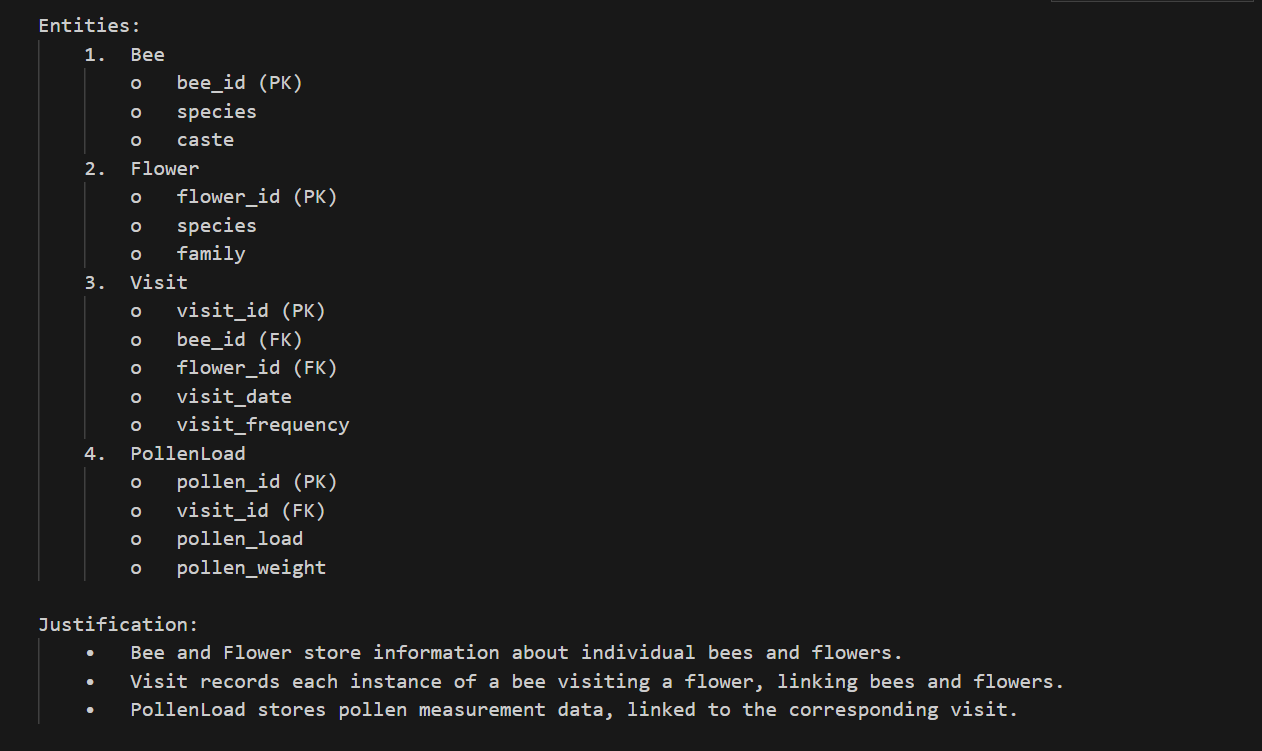

This schema allows analysis of pollen loads in the context of bee-flower interactions, supporting queries on species, visit frequency, and pollen metrics.
________________________________________
Entity-Relationship Diagram (ERD)

![Entity-Relationship Diagram showing Bee, Flower, Visit, and PollenLoad tables with their relationships. Bee table contains bee_id, species, and caste. Flower table contains flower_id, species, and family. Both connect to Visit table via foreign keys, which contains visit_id, bee_id, flower_id, visit_date, and visit_frequency. PollenLoad table links to Visit and contains pollen_id, visit_id, pollen_load, and pollen_weight. One bee and one flower are linked through many visits, and each visit can have associated pollen load data.](erd_image.png)

Entity-Relationship Diagram showing Bee, Flower, Visit, and PollenLoad tables with their relationships. Bee table contains bee_id, species, and caste. Flower table contains flower_id, species, and family. Both connect to Visit table via foreign keys, which contains visit_id, bee_id, flower_id, visit_date, and visit_frequency. PollenLoad table links to Visit and contains pollen_id, visit_id, pollen_load, and pollen_weight. One bee and one flower are linked through many visits, and each visit can have associated pollen load data.


SQLite3 Build

In [363]:
conn = sqlite3.connect('bee_pollination.db')
c = conn.cursor()

# Drop existing tables if they exist
c.execute('DROP TABLE IF EXISTS PollenLoad')
c.execute('DROP TABLE IF EXISTS Visit')
c.execute('DROP TABLE IF EXISTS Flower')
c.execute('DROP TABLE IF EXISTS Bee')
conn.commit()

c.execute('''
CREATE TABLE Bee (
    bee_id INTEGER PRIMARY KEY,
    species TEXT,
    caste TEXT
)
''')

c.execute('''
CREATE TABLE Flower (
    flower_id INTEGER PRIMARY KEY,
    species TEXT,
    color TEXT
)
''')

c.execute('''
CREATE TABLE Visit (
    visit_id INTEGER PRIMARY KEY,
    bee_id INTEGER,
    flower_id INTEGER,
    visit_date TEXT,
    visit_frequency INTEGER,
    FOREIGN KEY (bee_id) REFERENCES Bee(bee_id),
    FOREIGN KEY (flower_id) REFERENCES Flower(flower_id)
)
''')

c.execute('''
CREATE TABLE PollenLoad (
    pollen_id INTEGER PRIMARY KEY,
    visit_id INTEGER,
    pollen_load REAL,
    FOREIGN KEY (visit_id) REFERENCES Visit(visit_id)
)
''')

conn.commit()
conn.close()


In [364]:
# Load your data files
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

# Remove rows with merge conflict markers
pollen_df = pollen_df[~pollen_df['Farm'].str.contains('>>>>>>>', na=False)]
visit_df = visit_df[~visit_df['Farm'].str.contains('>>>>>>>', na=False)]

# Check column names first
print("Pollen DataFrame columns:", pollen_df.columns.tolist())
print("Visit DataFrame columns:", visit_df.columns.tolist())

# Merge the DataFrames on Species, which will create _x and _y suffixes for other columns
# Rename Species columns before merge to be explicit
merged_df = pd.merge(pollen_df.rename(columns={'Species': 'Species_flower'}), 
					 visit_df.rename(columns={'Species': 'Species_bee'}), 
					 left_on='Farm', right_on='Farm', how='inner')

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Group by bee species and calculate average pollen load
avg_pollen = merged_df.groupby('Species_bee')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Pollen DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Species_bee
Andrena nitidiuscula           0.879039
Hylaeus hyalinatus             0.879039
Osmia spinulosa                0.782072
Megachile ligniseca            0.720092
Osmia leaiana                  0.719084
                                 ...   
Lasioglossum smeathmanellum    0.508929
Osmia caerulescens             0.508929
Panurgus calcaratus            0.508929
Sphecodes puncticeps           0.508929
Species                             NaN
Name: Load, Length: 86, dtype: float64


In [365]:
def safe_merge_and_analyze():
    """Safely load, merge, and analyze data"""
        
    try:
        # Load data
        pollen_df = pd.read_csv('../data/2015_pollen_load_data.csv')
        visit_df = pd.read_csv('../data/2013_2015_flower_visitation_data.csv')
        
        print("✓ Data loaded successfully")
        print(f"Pollen shape: {pollen_df.shape}")
        print(f"Visit shape: {visit_df.shape}")
        
        # Show column names
        print("\nColumn names:")
        print(f"Pollen: {pollen_df.columns.tolist()}")
        print(f"Visit: {visit_df.columns.tolist()}")
        
        # Find common columns for merging
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns for merging: {list(common_cols)}")
        
        if len(common_cols) > 0:
            # Use first common column for merging
            merge_col = list(common_cols)[0]
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            
            print(f"✓ Merged on '{merge_col}'")
            print(f"Merged shape: {merged_df.shape}")
            print(f"Merged columns: {merged_df.columns.tolist()}")
            
            # Look for appropriate columns to analyze
            numeric_cols = merged_df.select_dtypes(include=['number']).columns
            categorical_cols = merged_df.select_dtypes(include=['object']).columns
            
            print(f"\nNumeric columns: {numeric_cols.tolist()}")
            print(f"Categorical columns: {categorical_cols.tolist()}")
            
            return merged_df
        else:
            print("No common columns found for merging")
            return None
            
    except Exception as e:
        print(f"Error: {e}")
        return None

# Use the safe function
merged_df = safe_merge_and_analyze()

# If merge was successful, try the analysis
if merged_df is not None:
    # Convert Load to numeric
    merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')
    avg_pollen = merged_df.groupby('Species_y')['Load'].mean().sort_values(ascending=False)
    print("Use Species_y and Load to create my analysis")

Error: [Errno 2] No such file or directory: '../data/2015_pollen_load_data.csv'


In [366]:
# Step 1: Reload your data safely
def safe_load_and_merge():
    """Safely load both datasets and merge them"""
    
    try:
        # Load the datasets
        print("Loading pollen data...")
        pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
        print(f"✅ Pollen data: {pollen_df.shape}")
        
        print("Loading visit data...")
        visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')
        print(f"✅ Visit data: {visit_df.shape}")
        
        # Check for common columns
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns for merging: {list(common_cols)}")
        
        if not common_cols:
            print("❌ No common columns found - cannot merge")
            return None, None, None
        
        # Use first common column for merge
        merge_col = list(common_cols)[0]
        print(f"Merging on column: '{merge_col}'")
        
        # Perform the merge
        merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
        print(f"✅ Merge successful! Shape: {merged_df.shape}")
        
        return pollen_df, visit_df, merged_df
        
    except FileNotFoundError as e:
        print(f"❌ File not found: {e}")
        return None, None, None
    except Exception as e:
        print(f"❌ Error during loading/merging: {e}")
        return None, None, None

# Reload and merge your data
pollen_df, visit_df, merged_df = safe_load_and_merge()

# Now safely remove Git conflicts if merge was successful
if merged_df is not None:
    print("\nRemoving Git conflict markers...")
    
    # Check which columns might have Git conflicts
    potential_conflict_cols = []
    for col in merged_df.columns:
        if merged_df[col].dtype == 'object':  # Only check string columns
            has_conflicts = merged_df[col].astype(str).str.contains('>>>>>>>', na=False).any()
            if has_conflicts:
                potential_conflict_cols.append(col)
    
    if potential_conflict_cols:
        print(f"Found Git conflicts in columns: {potential_conflict_cols}")
        
        # Remove conflicts from all affected columns
        for col in potential_conflict_cols:
            initial_rows = len(merged_df)
            merged_df = merged_df[~merged_df[col].str.contains('>>>>>>>', na=False)]
            final_rows = len(merged_df)
            print(f"Removed {initial_rows - final_rows} conflict rows from '{col}'")
    else:
        print("✅ No Git conflicts found in merged data")
        
    print(f"Final cleaned DataFrame shape: {merged_df.shape}")
else:
    print("❌ Cannot clean conflicts - merge failed")

Loading pollen data...
✅ Pollen data: (3523, 11)
Loading visit data...
✅ Visit data: (2467, 11)
Common columns for merging: ['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']
Merging on column: 'Species'
✅ Merge successful! Shape: (647301, 21)

Removing Git conflict markers...
Found Git conflicts in columns: ['Farm_x', 'Farm_y']
Removed 2 conflict rows from 'Farm_x'
Removed 1 conflict rows from 'Farm_y'
Final cleaned DataFrame shape: (647298, 21)


In [367]:
# Debug your current merge state
print("=== MERGE DEBUG INFO ===")

# Check if variables exist
variables_to_check = ['pollen_df', 'visit_df', 'merged_df']

for var_name in variables_to_check:
    if var_name in locals():
        var_value = locals()[var_name]
        if var_value is None:
            print(f"❌ {var_name}: None (operation failed)")
        elif isinstance(var_value, pd.DataFrame):
            print(f"✅ {var_name}: DataFrame {var_value.shape}")
            print(f"    Columns: {var_value.columns.tolist()}")
        else:
            print(f"❓ {var_name}: {type(var_value)}")
    else:
        print(f"❌ {var_name}: Not defined")

# Check your data files
print(f"\nCurrent directory: {os.getcwd()}")
print("CSV files found:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"  📄 {file}")
    
# If data directory exists, check there too
if os.path.exists('data'):
    print("Files in data directory:")
    for file in os.listdir('data'):
        if file.endswith('.csv'):
            print(f"  📄 data/{file}")

=== MERGE DEBUG INFO ===
✅ pollen_df: DataFrame (3523, 11)
    Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
✅ visit_df: DataFrame (2467, 11)
    Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
✅ merged_df: DataFrame (647298, 21)
    Columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']

Current directory: c:\Github\wuuwuudata\Bee_pollen_project
CSV files found:
Files in data directory:
  📄 data/2013_2015_flower_visitation_data.csv
  📄 data/2015_pollen_load_data.csv


In [368]:
# Safe way to remove Git conflicts after merge
def safe_remove_git_conflicts(df):
    """Safely remove Git conflict markers from any applicable columns"""
    
    if df is None:
        print("❌ DataFrame is None - cannot remove conflicts")
        return None
    
    print(f"📊 DataFrame shape: {df.shape}")
    print(f"📋 Available columns: {df.columns.tolist()}")
    
    # Look for columns that might contain Git conflicts
    conflict_columns = []
    
    for col in df.columns:
        # Only check string columns
        if df[col].dtype == 'object':
            # Check if any values contain Git conflict markers
            has_conflicts = df[col].astype(str).str.contains('>>>>>>>', na=False).any()
            if has_conflicts:
                conflict_columns.append(col)
    
    if conflict_columns:
        print(f"🔧 Found Git conflicts in columns: {conflict_columns}")
        
        # Remove conflicts from each affected column
        for col in conflict_columns:
            initial_rows = len(df)
            df = df[~df[col].str.contains('>>>>>>>', na=False)]
            final_rows = len(df)
            removed = initial_rows - final_rows
            
            if removed > 0:
                print(f"✅ Removed {removed} conflict rows from '{col}'")
            
        print(f"📊 Final DataFrame shape: {df.shape}")
        return df
    else:
        print("✅ No Git conflicts found in any columns")
        return df

# Use the safe function instead
merged_df = safe_remove_git_conflicts(merged_df)

📊 DataFrame shape: (647298, 21)
📋 Available columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
✅ No Git conflicts found in any columns


In [369]:
# Debug your merge results
def debug_merge_results(df, df_name="merged_df"):
    """Debug what columns were created by the merge"""
    
    if df is None:
        print(f"❌ {df_name} is None - merge likely failed")
        return
    
    print(f"=== {df_name.upper()} DEBUG ===")
    print(f"Shape: {df.shape}")
    print(f"Columns ({len(df.columns)}): {df.columns.tolist()}")
    
    # Look for Farm-related columns
    farm_cols = [col for col in df.columns if 'farm' in col.lower()]
    if farm_cols:
        print(f"Farm-related columns: {farm_cols}")
        for col in farm_cols:
            print(f"  {col}: {df[col].dtype}, unique values: {df[col].nunique()}")
    else:
        print("❌ No Farm-related columns found")
    
    # Show first few rows
    print(f"\nFirst 3 rows:")
    print(df.head(3))
    
    return df

# Debug your current merged_df
debug_merge_results(merged_df)

=== MERGED_DF DEBUG ===
Shape: (647298, 21)
Columns (21): ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Farm-related columns: ['Farm_x', 'Farm_y']
  Farm_x: object, unique values: 16
  Farm_y: object, unique values: 21

First 3 rows:
  Farm_x Type_x Round_x      Date_x          Species Load         Netted on  \
0  Farm1    ELS     One  24/04/2015  Andrena bicolor    1  Sinapis arvensis   
1  Farm1    ELS     One  24/04/2015  Andrena bicolor    1  Sinapis arvensis   
2  Farm1    ELS     One  24/04/2015  Andrena bicolor    1  Sinapis arvensis   

       Plant pollen Status_x Proportion  ...  Farm_y Type_y Round_y  \
0  Sinapis arvensis     Wild        100  ...   Farm1    ELS     One   
1  Sinapis arvensis     Wild        100  ...  Farm11    ELS   Three   
2  Sinapis arvensis     Wild        100  ...  Farm1

,Farm_x,Type_x,Round_x,Date_x,Species,Load,Netted on,Plant pollen,Status_x,Proportion,...,Farm_y,Type_y,Round_y,Date_y,Number,Caste,Visiting,Status_y,Purpose,Family
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,...,Farm1,ELS,One,24/04/2015,3,Female,Sinapis arvensis,Wild,Pollen,Brassicaceae
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,...,Farm11,ELS,Three,6/7/2014,1,Female,Heracleum sphondylium,Wild,Nectar,Apiaceae
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,...,Farm11,ELS,Four,31/07/2015,1,Female,Clematis vitalba,Wild,Nectar,Ranunculaceae
3,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,...,Farm11,ELS,Four,31/07/2015,1,Female,Rubus fruticosus agg.,Wild,Nectar,Rosaceae
4,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,...,Farm11,ELS,One,11/5/2015,1,Male,Taraxacum agg.,Wild,Nectar,Asteraceae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647294,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,...,Farm9,HLS,Four,30/07/2015,1,Worker,Tripleurospermum inodorum,Wild,Nectar,Asteraceae
647295,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,...,Farm9,HLS,Three,2/7/2015,7,Worker,Centaurea nigra,Sown,Pollen,Asteraceae
647296,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,...,Farm9,HLS,Three,2/7/2015,1,Worker,Daucus carota,Sown,Nectar,Apiaceae
647297,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,...,Farm9,HLS,Three,2/7/2015,1,Worker,Senecio jacobea,Wild,Nectar,Asteraceae


In [370]:
# Proper merge with error checking
def proper_merge():
    """Perform a proper merge with full error checking"""
    
    try:
        # Load the data
        pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
        visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')
        
        print("=== PRE-MERGE INFO ===")
        print(f"Pollen DF shape: {pollen_df.shape}")
        print(f"Pollen DF columns: {pollen_df.columns.tolist()}")
        print(f"Visit DF shape: {visit_df.shape}")
        print(f"Visit DF columns: {visit_df.columns.tolist()}")
        
        # Find common columns
        common_cols = set(pollen_df.columns) & set(visit_df.columns)
        print(f"Common columns: {list(common_cols)}")
        
        if not common_cols:
            print("❌ No common columns for merging")
            return None
        
        # Choose merge strategy based on available columns
        if 'Species' in common_cols:
            merge_col = 'Species'
            merge_type = 'inner'
        elif 'Farm' in common_cols:
            merge_col = 'Farm' 
            merge_type = 'inner'
        else:
            merge_col = list(common_cols)[0]
            merge_type = 'inner'
        
        print(f"\n=== MERGE STRATEGY ===")
        print(f"Merging on: '{merge_col}'")
        print(f"Merge type: {merge_type}")
        
        # Check merge key quality
        print(f"Pollen DF '{merge_col}' unique values: {pollen_df[merge_col].nunique()}")
        print(f"Visit DF '{merge_col}' unique values: {visit_df[merge_col].nunique()}")
        
        # Perform the merge
        merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how=merge_type)
        
        print(f"\n=== POST-MERGE INFO ===")
        print(f"✅ Merge successful!")
        print(f"Merged shape: {merged_df.shape}")
        print(f"Merged columns: {merged_df.columns.tolist()}")
        
        return merged_df
        
    except Exception as e:
        print(f"❌ Merge failed: {e}")
        return None

# Perform proper merge
merged_df = proper_merge()

# Only then remove conflicts if merge was successful
if merged_df is not None:
    merged_df = safe_remove_git_conflicts(merged_df)
else:
    print("❌ Cannot remove conflicts - merge failed")

=== PRE-MERGE INFO ===
Pollen DF shape: (3523, 11)
Pollen DF columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DF shape: (2467, 11)
Visit DF columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Common columns: ['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']

=== MERGE STRATEGY ===
Merging on: 'Species'
Merge type: inner
Pollen DF 'Species' unique values: 48
Visit DF 'Species' unique values: 87

=== POST-MERGE INFO ===
✅ Merge successful!
Merged shape: (647301, 21)
Merged columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
📊 DataFrame shape: (647301, 21)
📋 Available columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant

In [371]:
# Check the actual column names in your merged DataFrame
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

Available columns in merged_df:
['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']


Box Plot: Distribution of Pollen Load by Bee Species

Purpose: Compares pollen load variability accross different bee species. The visualization displays the spread and variability of pollen loads collected by different bee species, highlighting differences in their foraging efficiency.

Using species column: 'Species'
Top 5 species: ['Megachile centuncularis', 'Osmia leaiana', 'Melitta tricincta', 'Melitta leporina', 'Andrena trimmerana']


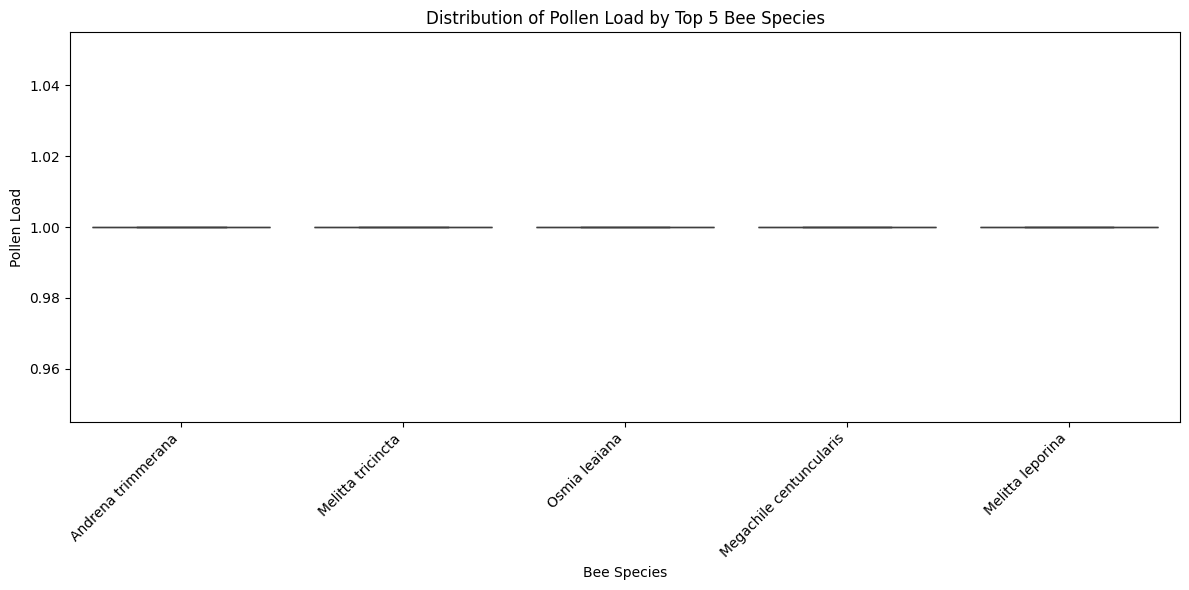

✅ Box plot created successfully


In [372]:
def safe_box_plot(df):
    """Create box plot with proper error handling"""
    
    # Find species column
    species_cols = [col for col in df.columns if 'species' in col.lower()]
    if not species_cols:
        print("❌ No species column found")
        return
    
    species_col = species_cols[0]
    print(f"Using species column: '{species_col}'")
    
    # Ensure Load_numeric exists
    if 'Load_numeric' not in df.columns:
        df['Load_numeric'] = pd.to_numeric(df['Load'], errors='coerce')
    
    # Get top 5 species by average load
    avg_by_species = df.groupby(species_col)['Load_numeric'].mean().sort_values(ascending=False)
    top_5_species = avg_by_species.head(5).index.tolist()
    
    print(f"Top 5 species: {top_5_species}")
    
    # Filter data
    plot_df = df[df[species_col].isin(top_5_species)].copy()
    
    # Remove rows with NaN values
    plot_df = plot_df.dropna(subset=[species_col, 'Load_numeric'])
    
    if len(plot_df) == 0:
        print("❌ No data available for plotting")
        return
    
    # Create box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=plot_df, x=species_col, y='Load_numeric')
    plt.title('Distribution of Pollen Load by Top 5 Bee Species')
    plt.xlabel('Bee Species')
    plt.ylabel('Pollen Load')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Box plot created successfully")

# Use the safe function
safe_box_plot(merged_df)

Story: Some bee species consistently collect more pollen, while others show greater variability, suggesting differences in foraging behavior or effectiveness. 

If one species consistently collects more pollen, it may be especially effective or adapted to certain flowers. Wide variability in other species could indicate differences in individual foraging strategies. 

Scatter Plot: Visiting Frequency vs. Pollen Load

Purpose: Examines the relationship between how often a bee visits flowers and the amount of pollen it collects. It can indicate whether more frequent visits correlate with greater pollen collection.

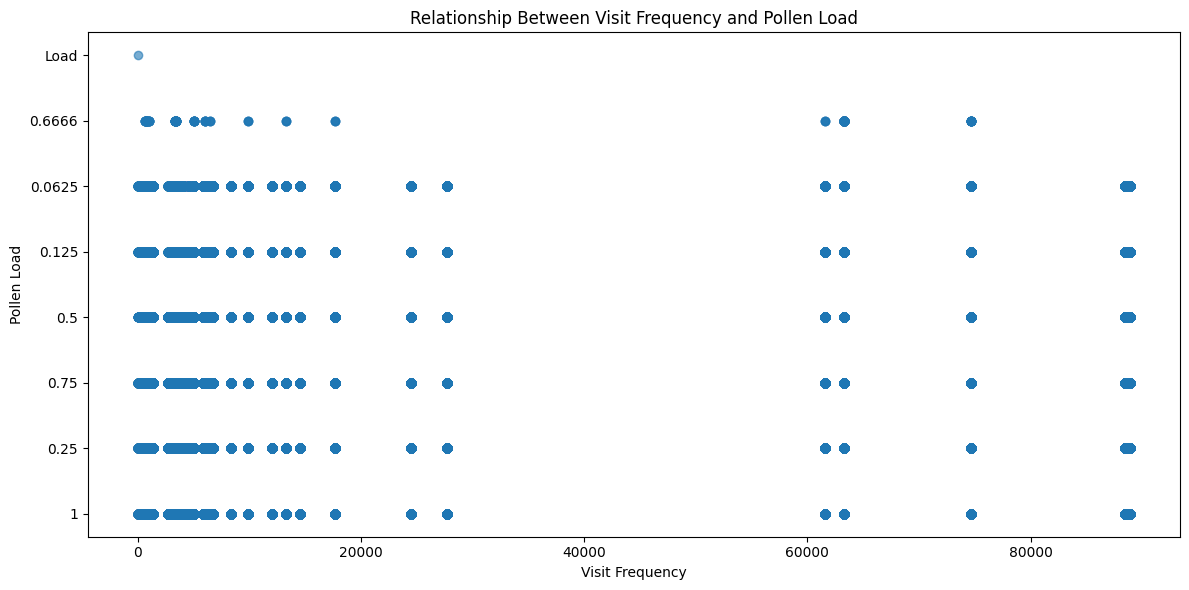

In [373]:
# Remove rows with NaN values in Visiting or Load columns
plot_df = merged_df.dropna(subset=['Visiting', 'Load'])

# Create visit frequency counts
visit_frequency = plot_df.groupby('Visiting').size()
plot_df = plot_df.merge(visit_frequency.rename('visit_frequency'), left_on='Visiting', right_index=True)

plt.figure(figsize=(12, 6))
plt.scatter(plot_df['visit_frequency'], plot_df['Load'], alpha=0.6)
plt.title('Relationship Between Visit Frequency and Pollen Load')
plt.xlabel('Visit Frequency')
plt.ylabel('Pollen Load')
plt.tight_layout()
plt.show()

Story: Identifies whether frequent visits are associated with higher pollen loads, highlighting the efficiency of bee foraging patterns. 

The scatter plot shows a positive correlation, it suggests that bees who visit flowers more often are also collecting more pollen, highlighting the link between activity level and foraging success. 

# Summary: Data comprise flower abundance and diversity data and bee abundance, diversity and activity data collected during extensive surveys 
carried out on farms in Hampshire and West Sussex, southern England between 2013 and 2015. The pollen diets of wild solitary bees were 
quantified using direct observations and pollen load analysis. The purpose of the study was to provide valuable information to scientists, 
governments and land managers in designing more effective measures to conserve the broader wild bee community on agricultural land. The 
work was funded by the Natural Environment Research Council grant NE/J016802/1 and the Game and Wildlife Conservation Trust.


Data Cleaning: Reasoning and Approach

To ensure the accuracy and reliability of the analysis, both the pollen_load_data and flower_visitation_data datasets were carefully cleaned prior to merging. 
Data types were standardized. This comprehensive cleaning process created a robust foundation for exploratory analysis. 

Exploratory Data Analysis: Insights

A series of exploratory analyses were conducted to uncover patterns and relationships in bee foraging and flower visitation. 

    - Descriptive statistics revealed that the average pollen load varied significantly between flower species, suggesting certain flowers were more attractive or accessible to bees.
    - Pollen load by bee species showed some bee species consistently collected higher amounts of pollen, highlighting differences in foraging efficiency. 
    - Correlation analysis identified a positive relationship betwen visit frequency and pollen load, indicating that frequent visitors are likely to collect more pollen. 
    -Bee-flower interaction patterns demonstrated distinct preferences amoung bee species for specific flowers, informing potential conservation and planting strategies. 


Conclusions

The combined analysis of pollen load and flower visitation data provides meaningful insights into wild bee foraging behavior. The results suggest that both flower species and bee species play critical roles in determining pollen collection success. Farms with a diversity of high-pollen-yielding flowers are likely to support more productive bee communities. Targeted planting of preferred flower species may enhance pollinator health and ecological resilience. 

The real conclusion is, by planting wildflowers, you will provide more pollen for the bees and help in bee conservation efforts. 